# Set up : normal ,  preprocessed

### **All Libraries**

In [1]:
# Data Handling
import pandas as pd

# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training & Splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Timing Execution
import time


### **Preparation du fichier / Analyse**

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("TESA_RAW.csv")

# Rename columns
df.columns = ["colum1", "colum2", "Label", "Text"]

# Drop the first two columns
df.drop(columns=["colum1", "colum2"], inplace=True)

# Count total rows before removing duplicates
initial_rows = len(df)

# Remove duplicate rows based on the "Text" column
df.drop_duplicates(subset=["Text"], keep="first", inplace=True)

# Count total rows after removing duplicates
final_rows = len(df)

# Calculate number of deleted rows
deleted_rows = initial_rows - final_rows

print(f"Processing complete: First two columns removed, {deleted_rows} duplicate(s) deleted")


Processing complete: First two columns removed, 5190 duplicate(s) deleted


Sentiment Distribution:
 Label
Negative      21166
Positive      19066
Neutral       17043
Irrelevant    12216
Name: count, dtype: int64


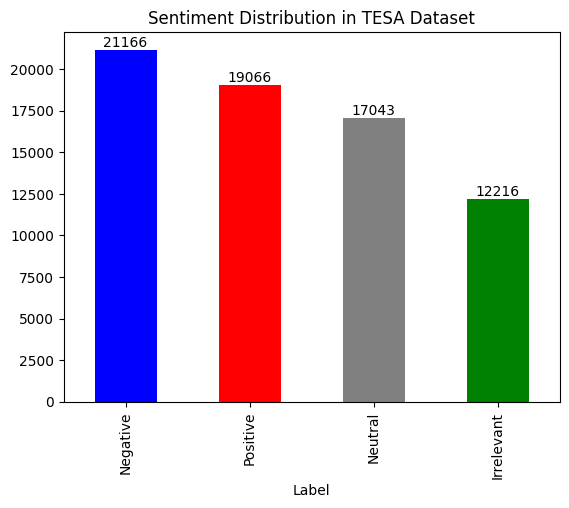

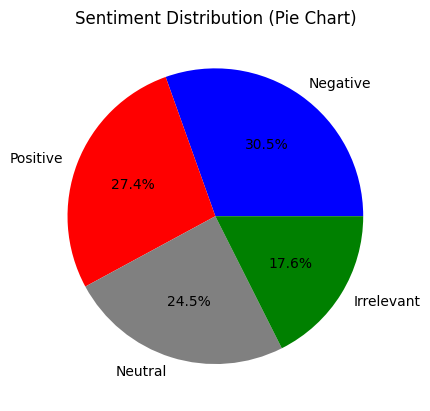

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 4 ratings
colors = ["blue", "red", "gray", "green"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in TESA Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart)")
plt.ylabel("")
#plt.savefig("pie_chart.png")
print("\n")
plt.show()


In [4]:
# Replace 'Positive' with 'POS' and 'Negative' with 'NEG' in the 'Label' column
df['Label'] = df['Label'].replace({'Positive': 'POS', 'Negative': 'NEG'})

# Keep only rows where 'Label' contains either 'POS' or 'NEG'
df = df[df['Label'].isin(['POS', 'NEG'])]


Sentiment Distribution:
 Label
NEG    21166
POS    19066
Name: count, dtype: int64


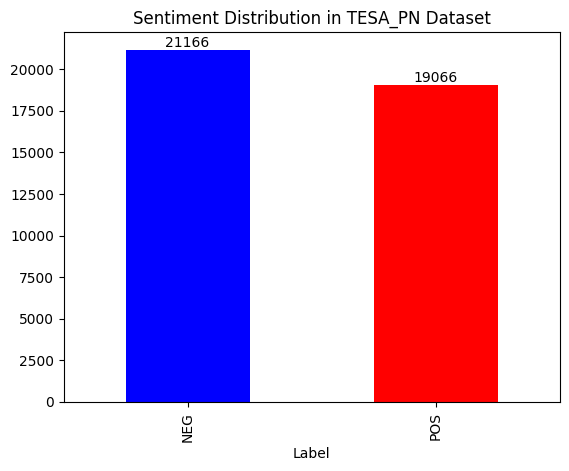

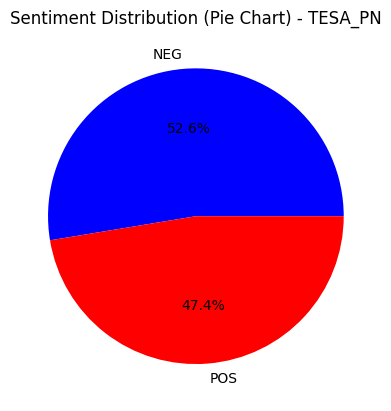

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 2 ratings
colors = ["blue", "red"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in TESA_PN Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart_pn.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart) - TESA_PN")
plt.ylabel("")
#plt.savefig("pie_chart_pn.png")
print("\n")
plt.show()


In [6]:
# Convert POS → 1 and NEG → 0
df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})

df.to_csv("TESA.csv", index=False)

print("Updated dataset saved as TESA.csv")


Updated dataset saved as TESA.csv


<ipython-input-6-1f8f98697c04>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})


### **Pretraitement**

In [7]:
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.isri import ISRIStemmer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
def remove_user_tags(text):
    if isinstance(text, str):
        # First case: @ followed by space and a word
        text = re.sub(r'@ \S+', '', text)
        # Second case: @ directly followed by a word
        text = re.sub(r'@\S+', '', text)
        return text
    return ''

def remove_pic_noise(text):
    if isinstance(text, str):
        # Remove "pic.XXXX" and handle optional spaces before "/"
        return re.sub(r'pic\.\S+(\s*/\s*\S+)?', '', text).strip()
    return text

def convert_to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    return ''

def remove_non_latin(text):
    if isinstance(text, str):
        return re.sub(r'[^a-z\s]', ' ', text)  # Replace non-latin characters with a space
    return ''

def tokenization(text):
    if isinstance(text, str):
        return re.findall(r'\S+', text)  # Matches sequences of non-space characters
    return []

def remove_ENG_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return []

def get_root(word, stemmer):
    if isinstance(word, str):
        return stemmer.stem(word)
    return word

def stemming_ENG(tokens):
    stemmer = PorterStemmer()
    return [get_root(token, stemmer) for token in tokens]

def rejoin_tokens(tokens):
    filtered_tokens = [token for token in tokens if isinstance(token, str) and token.strip()]
    return ' '.join(filtered_tokens)

In [9]:
def TESA_pretraitement(text):
    if isinstance(text, str):
        # Step 2: Remove user tags (e.g., @username)
        text = remove_user_tags(text)

        # Step 3: Remove picture noise (e.g., "pic.XXX/XXX")
        text = remove_pic_noise(text)

        # Step 4: Convert to lowercase
        text = convert_to_lowercase(text)

        # Step 5: Remove non-latin characters
        text = remove_non_latin(text)

        # Step 6: Tokenization (split text into tokens)
        tokens = tokenization(text)

        # Step 7: Remove English stopwords
        tokens = remove_ENG_stopwords(tokens)

        # Step 8: Apply stemming (Porter Stemmer for English)
        tokens = stemming_ENG(tokens)

        # Step 9: Rejoin tokens into a single string
        return rejoin_tokens(tokens)

    return ''

In [10]:
print(f"Start processing TESA ...\n")
TESA = pd.read_csv("/content/TESA.csv")
TESA["Text"] = [TESA_pretraitement(text) for text in df["Text"]]
TESA.to_csv("/content/TESA_Pre.csv", index=False)
print(f"Finished processing TESA!\n")

Start processing TESA ...

Finished processing TESA!



# Set up : Algorithms Functions

### Libraries

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

### **Visualisation / Metrics**

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_results(confusion_matrix, y_test, y_pred, dataset_name, algorithm_name, execution_time, num_positive, num_negative):
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]

    epsilon = 1e-10
    accuracy = (TP + TN) / (TP + TN + FP + FN + epsilon)

    # Per-class metrics
    precision_per_class = precision_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    recall_per_class = recall_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    support_0 = sum(y_test == 0)
    support_1 = sum(y_test == 1)

    # Prepare result dict (optional to return it)
    results = {
        "Dataset": dataset_name,
        "Algorithm": algorithm_name,
        "Confusion Matrix": confusion_matrix,
        "Accuracy": round(accuracy, 4),
        "Precision_0": round(precision_per_class[0], 4),
        "Recall_0": round(recall_per_class[0], 4),
        "F1_0": round(f1_per_class[0], 4),
        "Support_0": support_0,
        "Precision_1": round(precision_per_class[1], 4),
        "Recall_1": round(recall_per_class[1], 4),
        "F1_1": round(f1_per_class[1], 4),
        "Support_1": support_1,
        "Number of Positive Samples": num_positive,
        "Number of Negative Samples": num_negative,
        "Execution Time (s)": round(execution_time, 4)
    }

    # --- Visualization ---
    title = f"{dataset_name} with {algorithm_name}"
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), gridspec_kw={'width_ratios': [1, 1.1]})
    fig.suptitle(title, fontsize=14, fontweight='bold')

    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
                square=True, linewidths=0, linecolor='white')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.set_title('Confusion Matrix', fontsize=12)
    ax1.set_xticklabels(['Negative', 'Positive'])
    ax1.set_yticklabels(['Negative', 'Positive'])

    ax2.axis('off')
    ax2.set_title('Statistics Summary', fontsize=12, fontweight='bold', loc='left')

    stats_text = [
        f"Accuracy: {results['Accuracy']}",
        f"Execution Time: {execution_time:.2f} sec",
        f"Training Positives: {num_positive}",
        f"Training Negatives: {num_negative}"
    ]
    y_text = 0.95
    for line in stats_text:
        ax2.text(0.01, y_text, line, fontsize=11, va='top')
        y_text -= 0.07

    col_labels = ['Precision', 'Recall', 'F1 Score', 'Support']
    row_labels = ['Class 0 (Neg)', 'Class 1 (Pos)']
    cell_data = [
        [results['Precision_0'], results['Recall_0'], results['F1_0'], results['Support_0']],
        [results['Precision_1'], results['Recall_1'], results['F1_1'], results['Support_1']]
    ]
    table = ax2.table(
        cellText=cell_data,
        rowLabels=row_labels,
        colLabels=col_labels,
        cellLoc='center',
        colLoc='center',
        loc='center',
        bbox=[0.01, 0.05, 0.9, 0.3]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(0.95, 1.0)

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

    return results


### **Vectorize**

In [13]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

def vectorize_text_data(csv_path, sample_percentage=1.0):
    df = pd.read_csv(csv_path, encoding='utf-8-sig')
    df = df[df['Text'].notna() & (df['Text'] != "")]

    if sample_percentage < 1.0:
        df = df.sample(frac=sample_percentage, random_state=42).reset_index(drop=True)

    X = df['Text']
    y = df['Label']

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    return X_train_tfidf, X_test_tfidf, y_train, y_test, df

### **Traitement**

In [14]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

def run_model_on_vectorized_data(X_train_tfidf, X_test_tfidf, y_train, y_test, df, model_class, model_name, dataset_name, model_params=None):
    # Create and Train Model
    model = model_class(**(model_params or {}))
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    execution_time = time.time() - start_time

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics
    results = analyze_and_visualize_results(
        confusion_matrix=cm,
        y_test=y_test,
        y_pred=y_pred,
        dataset_name=dataset_name,
        algorithm_name=model_name,
        execution_time=execution_time,
        num_positive=len(df[df['Label'] == 1]),
        num_negative=len(df[df['Label'] == 0])
    )

    return results


### **Hyper Parameter Testing Function (one datasets)**

In [15]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import time

def test_model_with_param_from_vectorized_data(X_train_tfidf, X_test_tfidf, y_train, y_test, df, model_class, param_name, param_values, dataset_label="Dataset"):
    print("\n\n")
    f1_scores_class_0 = []
    f1_scores_class_1 = []
    avg_f1_scores = []
    valid_param_values = []

    for value in param_values:
        try:
            model = model_class(**{param_name: value})
            start_time = time.time()
            model.fit(X_train_tfidf, y_train)
            y_pred = model.predict(X_test_tfidf)
            exec_time = time.time() - start_time

            f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1])
            f1_scores_class_0.append(f1_per_class[0])
            f1_scores_class_1.append(f1_per_class[1])
            avg = (f1_per_class[0] + f1_per_class[1]) / 2
            avg_f1_scores.append(avg)
            valid_param_values.append(value)

            print(f"{param_name}: {value} | F1[0]: {round(f1_per_class[0], 4)} | F1[1]: {round(f1_per_class[1], 4)} | Avg F1: {round(avg, 4)} | Time: {round(exec_time, 4)}s")

        except Exception as e:
            print(f"Skipping {param_name} = {value} due to error: {e}")

    if not valid_param_values:
        print(" No successful parameter values to display.")
        return None  # Explicit return when nothing worked

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(valid_param_values, f1_scores_class_0, marker='o', linestyle='--', color='red', label='F1 Score - Class 0 (Negative)')
    plt.plot(valid_param_values, f1_scores_class_1, marker='o', linestyle='-', color='blue', label='F1 Score - Class 1 (Positive)')
    plt.title(f'{dataset_label}\nF1 Score vs {param_name}', fontsize=14, fontweight='bold')
    plt.xlabel(param_name)
    plt.ylabel('F1 Score')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Summary
    best_idx = avg_f1_scores.index(max(avg_f1_scores))
    best_param = valid_param_values[best_idx]
    best_score = avg_f1_scores[best_idx]

    print(f"\nBest {param_name} = {best_param} with Avg F1 = {round(best_score, 4)}")

    return best_param  # returns the best value

### **Victorize all data**

In [16]:
# === Global table to store results from all algorithms
all_Algo_results = pd.DataFrame()

# === Step 0: Load and vectorize datasets
X_train1, X_test1, y_train1, y_test1, df1 = vectorize_text_data("TESA.csv",0.02)
X_train2, X_test2, y_train2, y_test2, df2 = vectorize_text_data("TESA_Pre.csv",0.02)

datasets = {
    "TESA":                         (X_train1, X_test1, y_train1, y_test1, df1),
    "TESA_Preprocessed":           (X_train2, X_test2, y_train2, y_test2, df2),
}


# TESA Dataset - Full Comparison of 8 Algorithms

## **Multinomial Naive Bayes**


=== Step 1: MultinomialNB with DEFAULT parameters ===


-- Running default model on TESA --


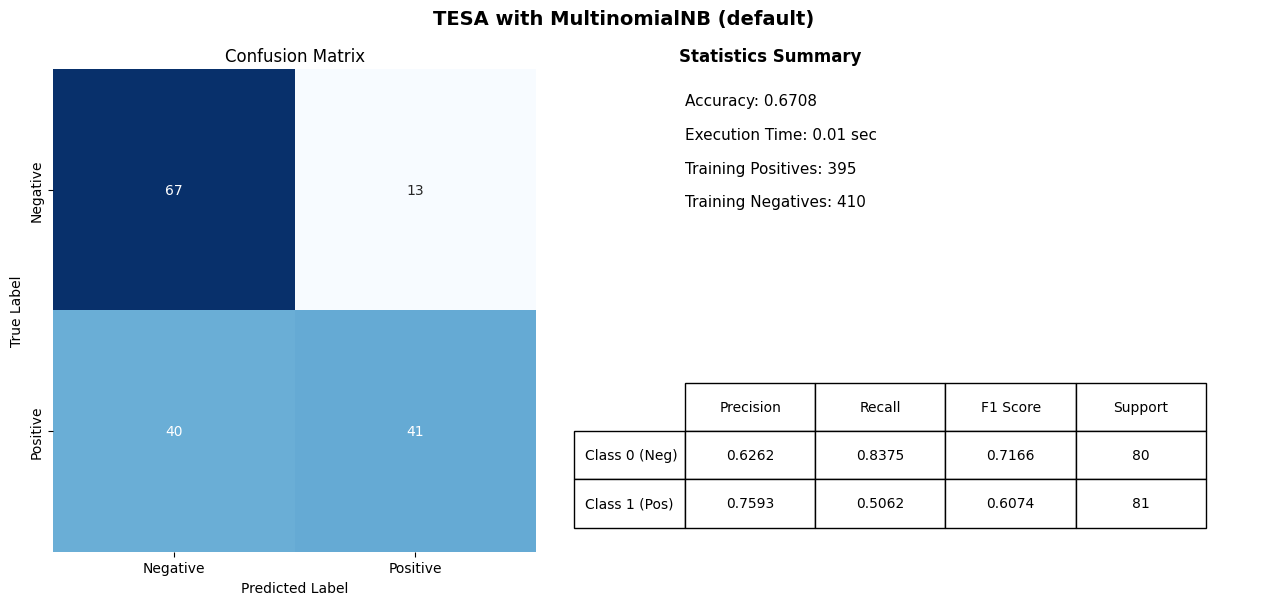


-- Running default model on TESA_Preprocessed --


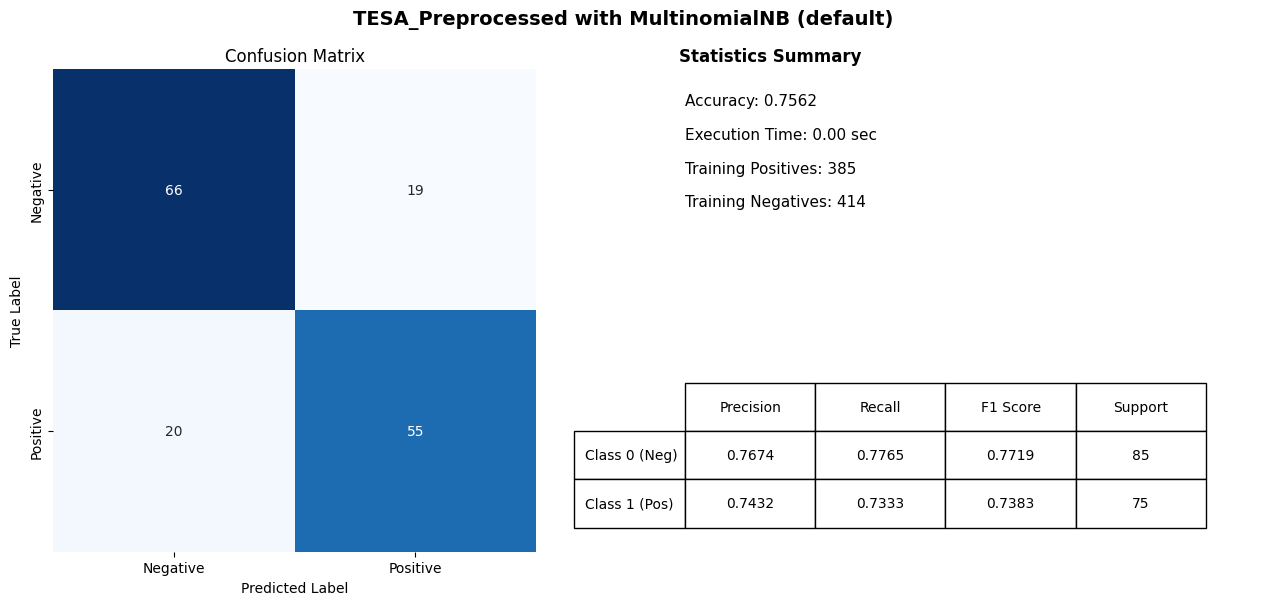


=== Step 2: Tuning alpha for MultinomialNB ===


-- Tuning TESA --



alpha: 0.0001 | F1[0]: 0.6782 | F1[1]: 0.6216 | Avg F1: 0.6499 | Time: 0.0044s
alpha: 0.01 | F1[0]: 0.6821 | F1[1]: 0.6309 | Avg F1: 0.6565 | Time: 0.0028s
alpha: 0.05 | F1[0]: 0.6821 | F1[1]: 0.6309 | Avg F1: 0.6565 | Time: 0.0027s
alpha: 0.1 | F1[0]: 0.6821 | F1[1]: 0.6309 | Avg F1: 0.6565 | Time: 0.0031s
alpha: 0.5 | F1[0]: 0.7072 | F1[1]: 0.6241 | Avg F1: 0.6656 | Time: 0.0021s
alpha: 1.0 | F1[0]: 0.7166 | F1[1]: 0.6074 | Avg F1: 0.662 | Time: 0.0021s
alpha: 2.0 | F1[0]: 0.7216 | F1[1]: 0.5781 | Avg F1: 0.6499 | Time: 0.0023s
alpha: 5.0 | F1[0]: 0.7363 | F1[1]: 0.562 | Avg F1: 0.6492 | Time: 0.0025s
alpha: 10.0 | F1[0]: 0.7204 | F1[1]: 0.4685 | Avg F1: 0.5944 | Time: 0.002s


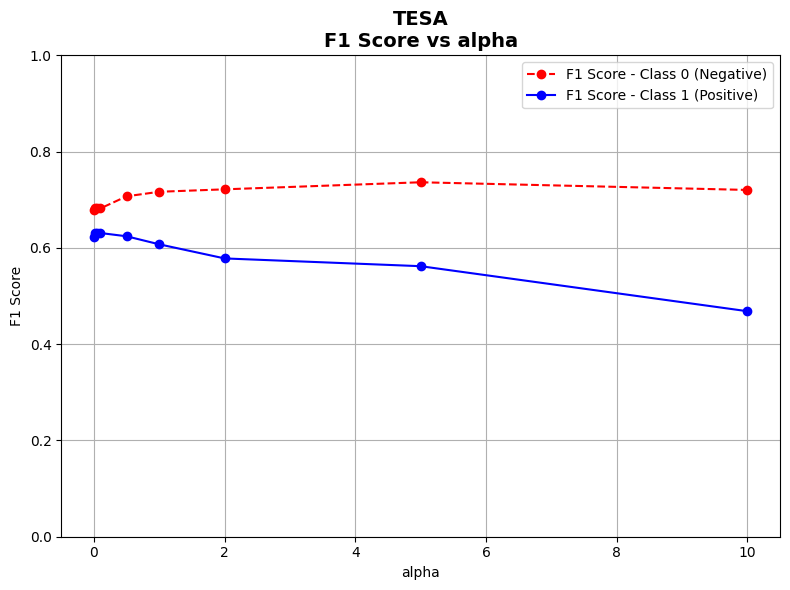


Best alpha = 0.5 with Avg F1 = 0.6656

-- Tuning TESA_Preprocessed --



alpha: 0.0001 | F1[0]: 0.7345 | F1[1]: 0.6713 | Avg F1: 0.7029 | Time: 0.0051s
alpha: 0.01 | F1[0]: 0.7429 | F1[1]: 0.6897 | Avg F1: 0.7163 | Time: 0.0027s
alpha: 0.05 | F1[0]: 0.7701 | F1[1]: 0.726 | Avg F1: 0.7481 | Time: 0.0024s
alpha: 0.1 | F1[0]: 0.7746 | F1[1]: 0.7347 | Avg F1: 0.7546 | Time: 0.0022s
alpha: 0.5 | F1[0]: 0.7765 | F1[1]: 0.7467 | Avg F1: 0.7616 | Time: 0.0017s
alpha: 1.0 | F1[0]: 0.7719 | F1[1]: 0.7383 | Avg F1: 0.7551 | Time: 0.0018s
alpha: 2.0 | F1[0]: 0.7816 | F1[1]: 0.7397 | Avg F1: 0.7607 | Time: 0.0017s
alpha: 5.0 | F1[0]: 0.7931 | F1[1]: 0.7534 | Avg F1: 0.7733 | Time: 0.0017s
alpha: 10.0 | F1[0]: 0.7821 | F1[1]: 0.7234 | Avg F1: 0.7528 | Time: 0.0017s


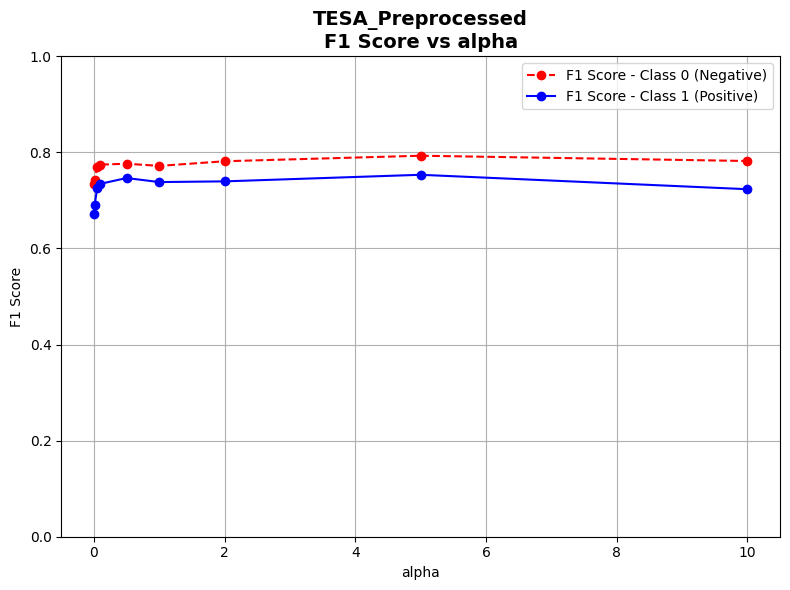


Best alpha = 5.0 with Avg F1 = 0.7733

=== Step 3: MultinomialNB with BEST alpha ===


-- TESA with best alpha = 0.5 --


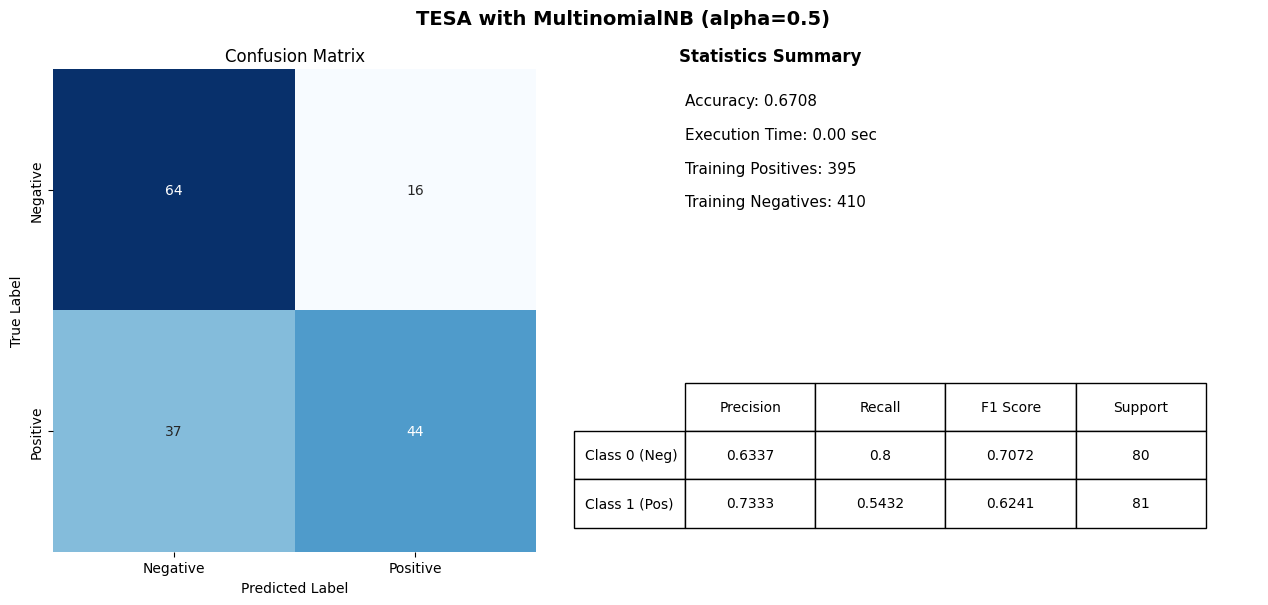


-- TESA_Preprocessed with best alpha = 5.0 --


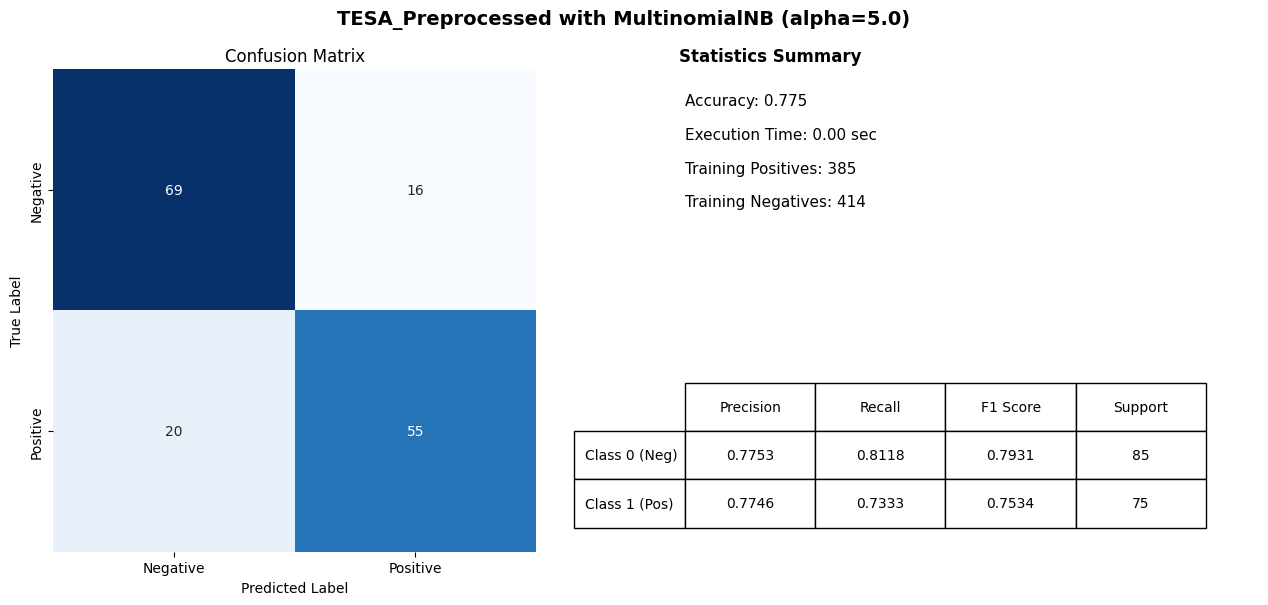

Results saved to 'MultinomialNB_Results.csv'


In [17]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

param_values = [0.0001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_MNB_results = []

# === Step 1: Run MultinomialNB with default alpha
print("\n=== Step 1: MultinomialNB with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        model_name="MultinomialNB (default)",
        dataset_name=label
    )
    result["Model Group"] = "MultinomialNB"
    all_MNB_results.append(result)

# === Step 2: Hyperparameter tuning
print("\n=== Step 2: Tuning alpha for MultinomialNB ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_alpha = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        param_name="alpha",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_alpha

# === Step 3: Evaluate using best alpha
print("\n=== Step 3: MultinomialNB with BEST alpha ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_alpha = best_params[label]
    print(f"\n-- {label} with best alpha = {best_alpha} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        model_name=f"MultinomialNB (alpha={best_alpha})",
        dataset_name=label,
        model_params={"alpha": best_alpha}
    )
    result["Model Group"] = "MultinomialNB"
    all_MNB_results.append(result)

# === Save and append to global results
results_df = pd.DataFrame(all_MNB_results)

# Save to individual CSV
results_df.to_csv("MultinomialNB_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'MultinomialNB_Results.csv'")

# Append to master table for all algorithms
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)

## **Complement Naive Bayes**


=== Step 1: ComplementNB with DEFAULT parameters ===


-- Running default model on TESA --


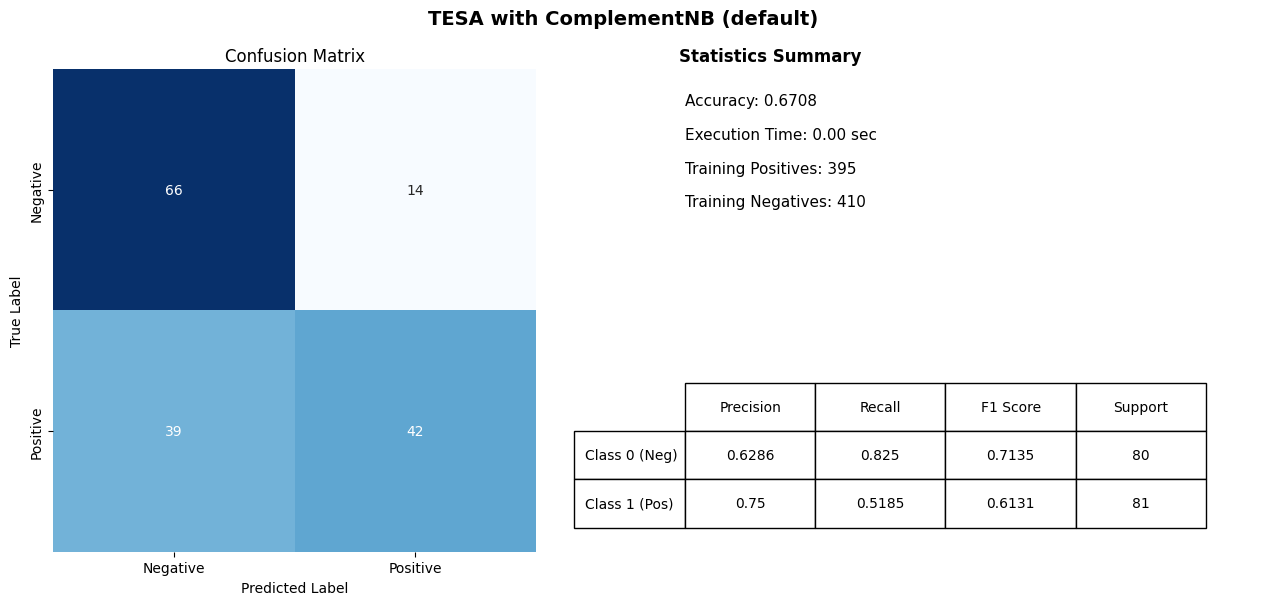


-- Running default model on TESA_Preprocessed --


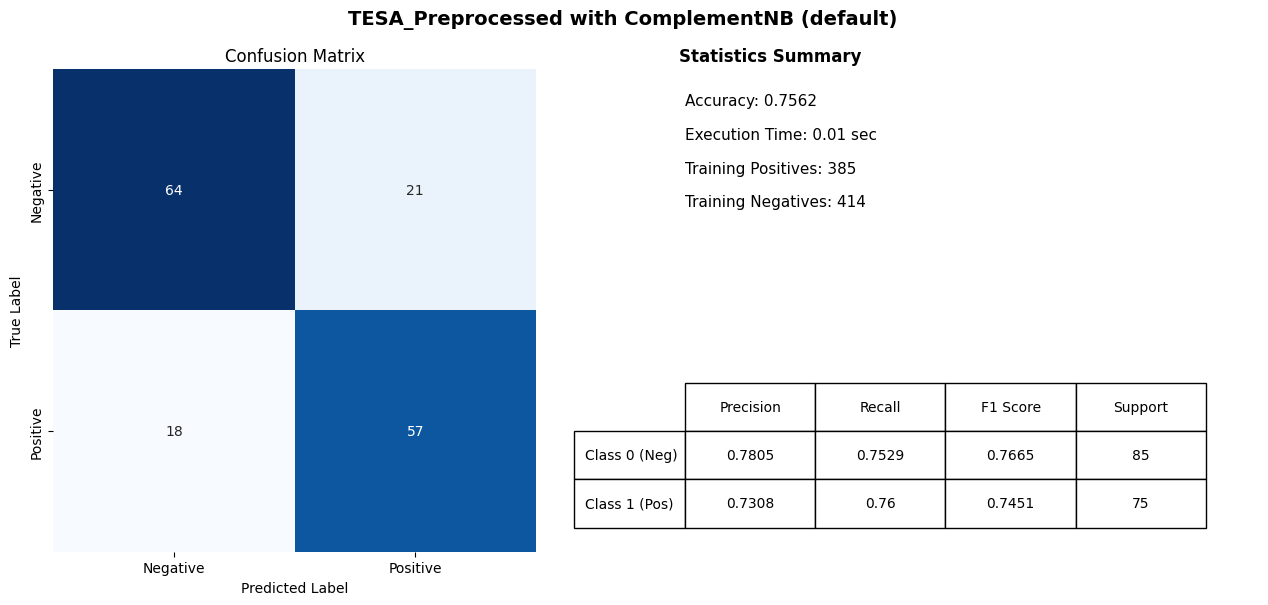


=== Step 2: Tuning alpha for ComplementNB ===


-- Tuning TESA --



alpha: 0.0001 | F1[0]: 0.6782 | F1[1]: 0.6216 | Avg F1: 0.6499 | Time: 0.0045s
alpha: 0.01 | F1[0]: 0.6821 | F1[1]: 0.6309 | Avg F1: 0.6565 | Time: 0.0031s
alpha: 0.05 | F1[0]: 0.6821 | F1[1]: 0.6309 | Avg F1: 0.6565 | Time: 0.0038s
alpha: 0.1 | F1[0]: 0.6821 | F1[1]: 0.6309 | Avg F1: 0.6565 | Time: 0.0028s
alpha: 0.5 | F1[0]: 0.7079 | F1[1]: 0.6389 | Avg F1: 0.6734 | Time: 0.0024s
alpha: 1.0 | F1[0]: 0.7135 | F1[1]: 0.6131 | Avg F1: 0.6633 | Time: 0.0024s
alpha: 2.0 | F1[0]: 0.709 | F1[1]: 0.5865 | Avg F1: 0.6477 | Time: 0.0021s
alpha: 5.0 | F1[0]: 0.7179 | F1[1]: 0.5669 | Avg F1: 0.6424 | Time: 0.0019s
alpha: 10.0 | F1[0]: 0.7411 | F1[1]: 0.592 | Avg F1: 0.6666 | Time: 0.0018s


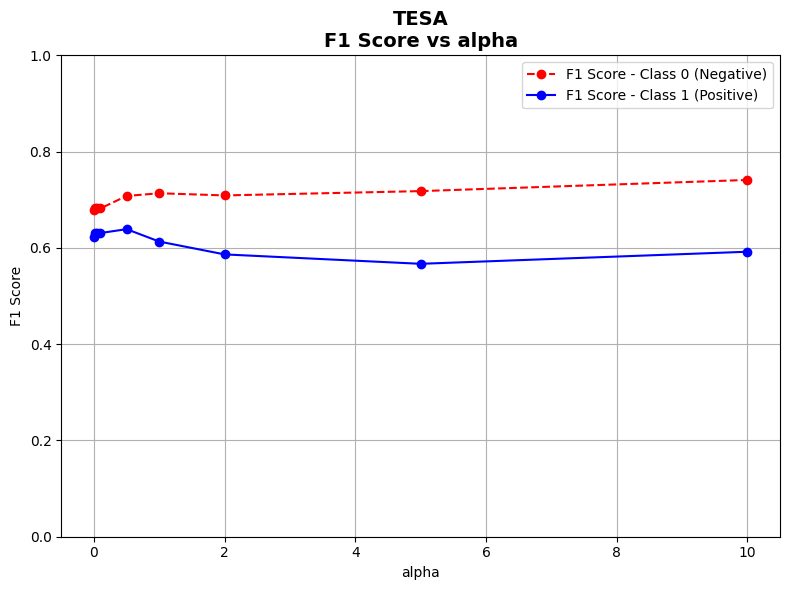


Best alpha = 0.5 with Avg F1 = 0.6734

-- Tuning TESA_Preprocessed --



alpha: 0.0001 | F1[0]: 0.7345 | F1[1]: 0.6713 | Avg F1: 0.7029 | Time: 0.0039s
alpha: 0.01 | F1[0]: 0.7429 | F1[1]: 0.6897 | Avg F1: 0.7163 | Time: 0.003s
alpha: 0.05 | F1[0]: 0.7701 | F1[1]: 0.726 | Avg F1: 0.7481 | Time: 0.0024s
alpha: 0.1 | F1[0]: 0.7746 | F1[1]: 0.7347 | Avg F1: 0.7546 | Time: 0.0021s
alpha: 0.5 | F1[0]: 0.7784 | F1[1]: 0.7582 | Avg F1: 0.7683 | Time: 0.0019s
alpha: 1.0 | F1[0]: 0.7665 | F1[1]: 0.7451 | Avg F1: 0.7558 | Time: 0.0018s
alpha: 2.0 | F1[0]: 0.7758 | F1[1]: 0.7613 | Avg F1: 0.7685 | Time: 0.0023s
alpha: 5.0 | F1[0]: 0.7927 | F1[1]: 0.7821 | Avg F1: 0.7874 | Time: 0.0018s
alpha: 10.0 | F1[0]: 0.7927 | F1[1]: 0.7821 | Avg F1: 0.7874 | Time: 0.0018s


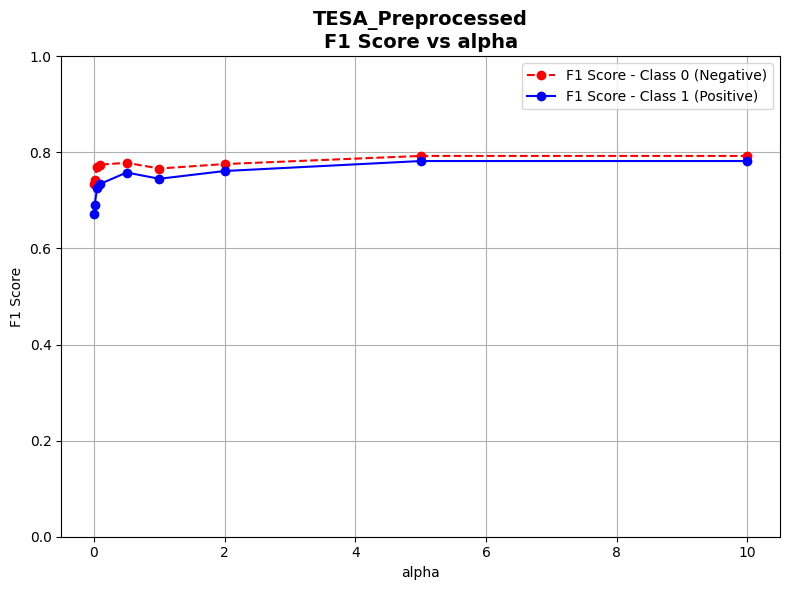


Best alpha = 5.0 with Avg F1 = 0.7874

=== Step 3: ComplementNB with BEST alpha ===


-- TESA with best alpha = 0.5 --


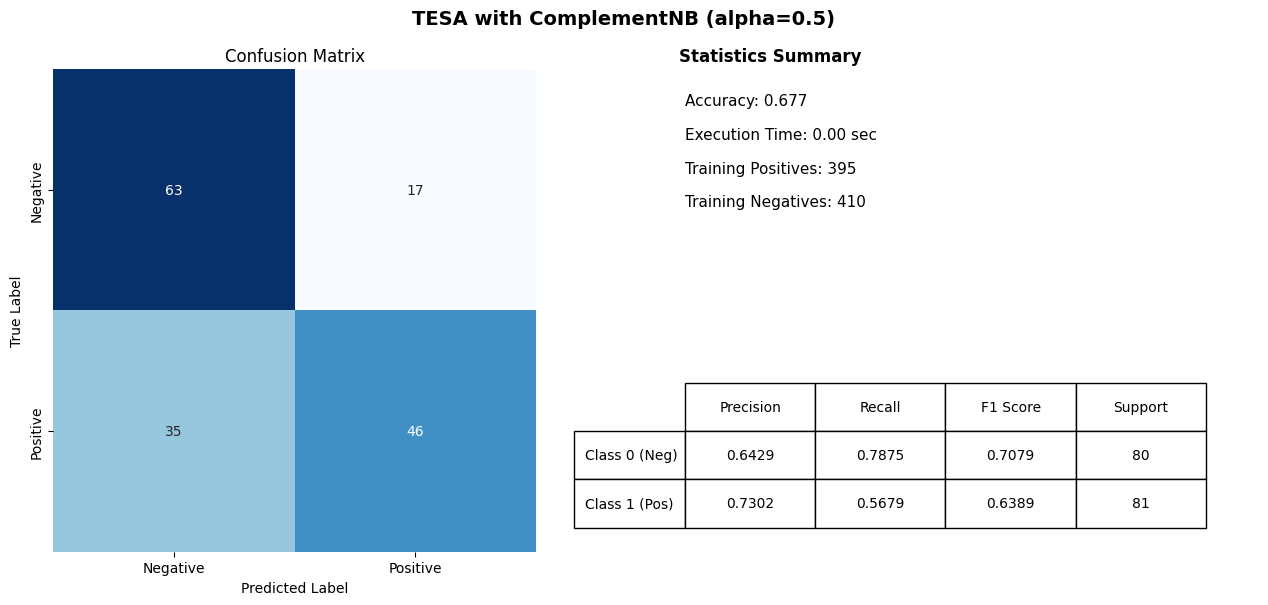


-- TESA_Preprocessed with best alpha = 5.0 --


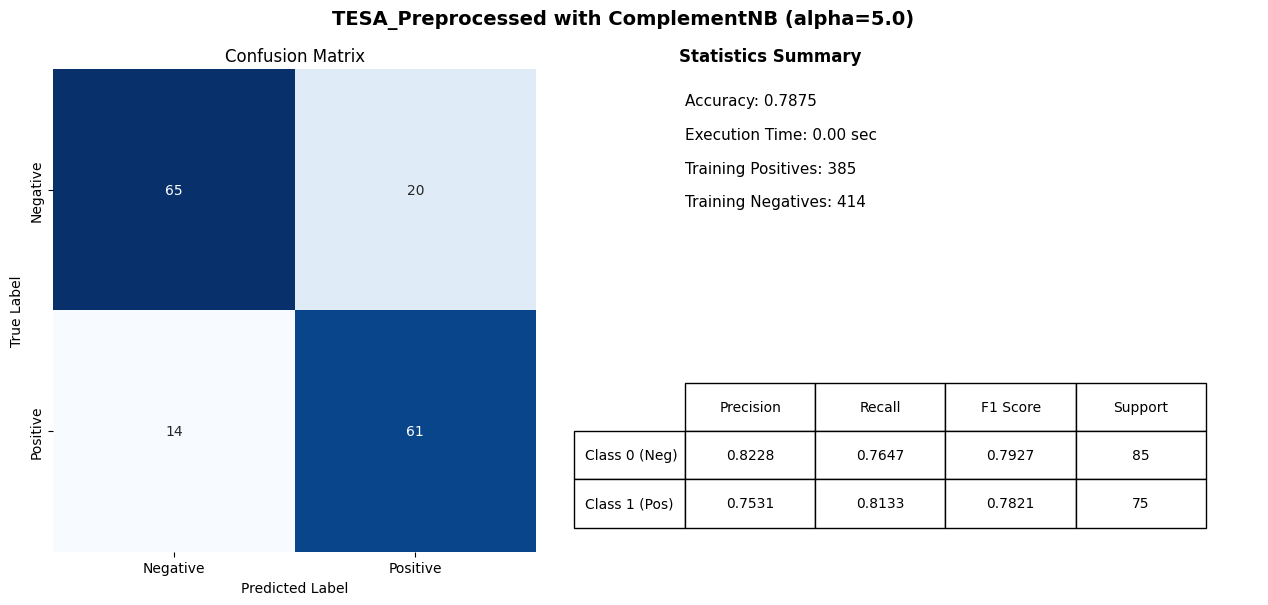

Results saved to 'ComplementNB_Results.csv'


In [18]:
from sklearn.naive_bayes import ComplementNB

param_values = [0.0001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_CNB_results = []

# === Step 1: Run ComplementNB with default alpha
print("\n=== Step 1: ComplementNB with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        model_name="ComplementNB (default)",
        dataset_name=label
    )
    result["Model Group"] = "ComplementNB"
    all_CNB_results.append(result)

# === Step 2: Hyperparameter tuning
print("\n=== Step 2: Tuning alpha for ComplementNB ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_alpha = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        param_name="alpha",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_alpha

# === Step 3: Evaluate using best alpha
print("\n=== Step 3: ComplementNB with BEST alpha ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_alpha = best_params[label]
    print(f"\n-- {label} with best alpha = {best_alpha} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        model_name=f"ComplementNB (alpha={best_alpha})",
        dataset_name=label,
        model_params={"alpha": best_alpha}
    )
    result["Model Group"] = "ComplementNB"
    all_CNB_results.append(result)

# === Save and append to global results
results_df = pd.DataFrame(all_CNB_results)

# Save to individual CSV
results_df.to_csv("ComplementNB_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'ComplementNB_Results.csv'")

# Append to master table for all algorithms
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **SVM (Linear)**


=== Step 1: LinearSVC with DEFAULT parameters ===


-- Running default model on TESA --


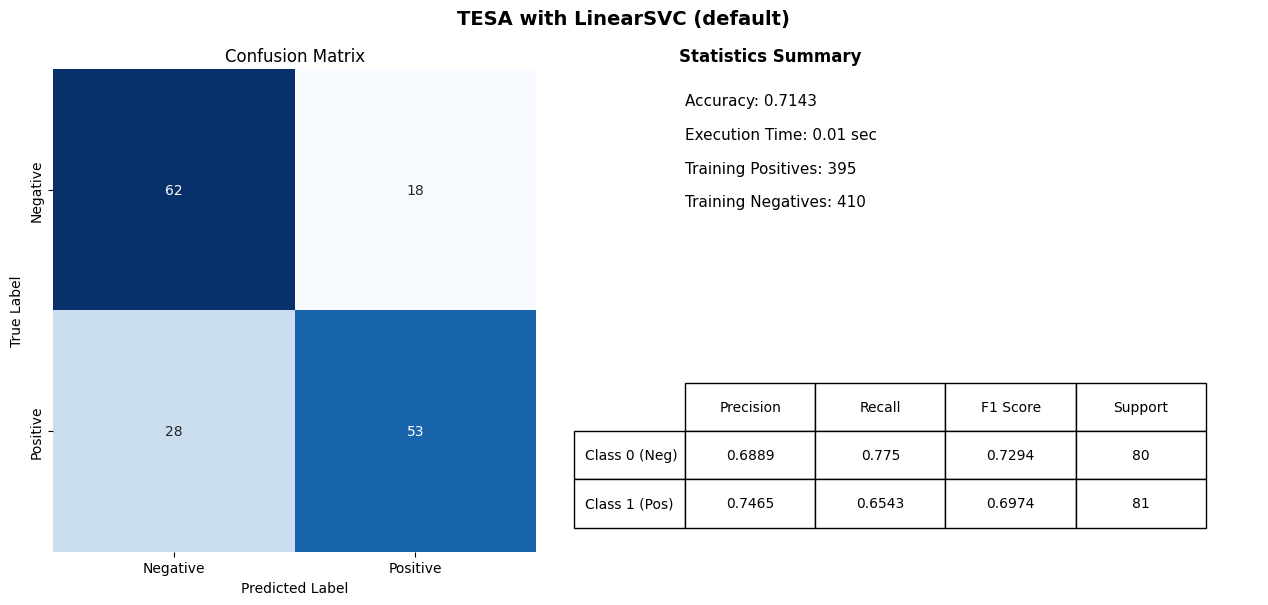


-- Running default model on TESA_Preprocessed --


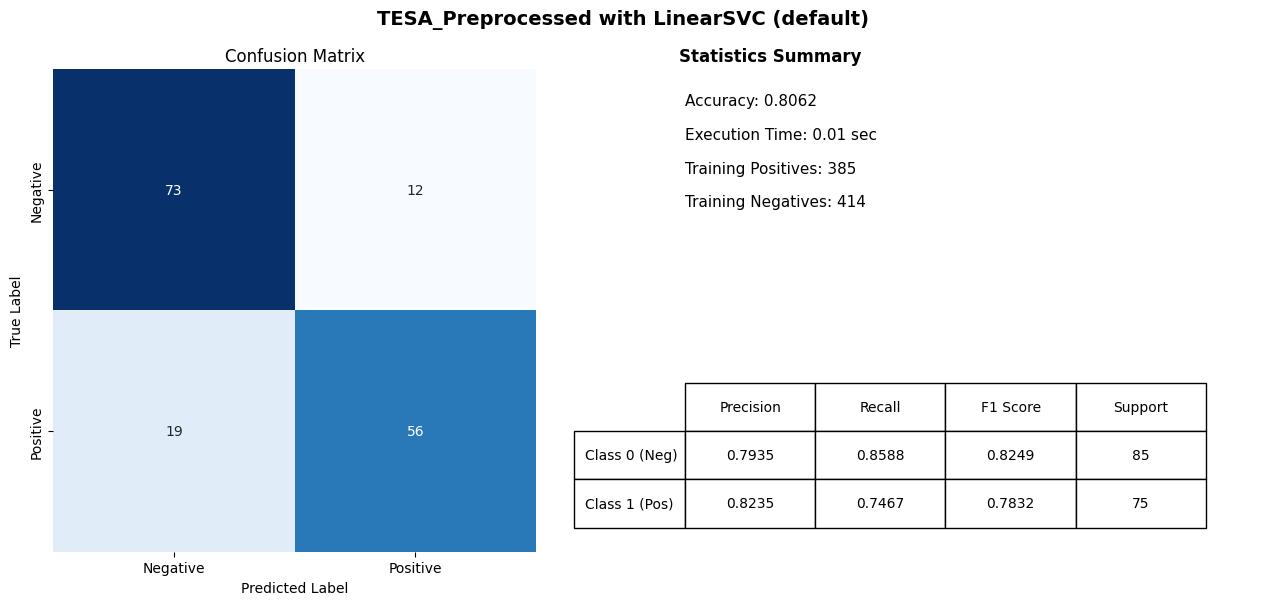


=== Step 2: Tuning C for LinearSVC ===


-- Tuning TESA --



C: 0.001 | F1[0]: 0.6639 | F1[1]: 0.0 | Avg F1: 0.332 | Time: 0.0035s
C: 0.01 | F1[0]: 0.7238 | F1[1]: 0.4821 | Avg F1: 0.603 | Time: 0.0027s
C: 0.1 | F1[0]: 0.7119 | F1[1]: 0.6483 | Avg F1: 0.6801 | Time: 0.003s
C: 0.5 | F1[0]: 0.7368 | F1[1]: 0.702 | Avg F1: 0.7194 | Time: 0.0046s
C: 1.0 | F1[0]: 0.7294 | F1[1]: 0.6974 | Avg F1: 0.7134 | Time: 0.0037s
C: 2.0 | F1[0]: 0.7251 | F1[1]: 0.6887 | Avg F1: 0.7069 | Time: 0.0041s
C: 5.0 | F1[0]: 0.7399 | F1[1]: 0.698 | Avg F1: 0.7189 | Time: 0.006s
C: 10.0 | F1[0]: 0.7514 | F1[1]: 0.7114 | Avg F1: 0.7314 | Time: 0.0125s


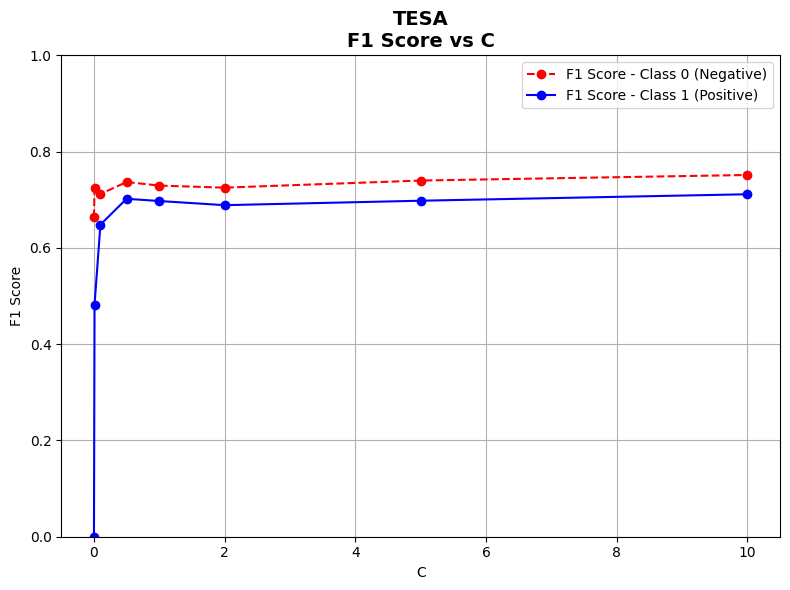


Best C = 10.0 with Avg F1 = 0.7314

-- Tuning TESA_Preprocessed --



C: 0.001 | F1[0]: 0.6939 | F1[1]: 0.0 | Avg F1: 0.3469 | Time: 0.0039s
C: 0.01 | F1[0]: 0.78 | F1[1]: 0.6333 | Avg F1: 0.7067 | Time: 0.0026s
C: 0.1 | F1[0]: 0.8092 | F1[1]: 0.7755 | Avg F1: 0.7924 | Time: 0.0028s
C: 0.5 | F1[0]: 0.8161 | F1[1]: 0.7808 | Avg F1: 0.7985 | Time: 0.0036s
C: 1.0 | F1[0]: 0.8249 | F1[1]: 0.7832 | Avg F1: 0.804 | Time: 0.0031s
C: 2.0 | F1[0]: 0.8136 | F1[1]: 0.7692 | Avg F1: 0.7914 | Time: 0.004s
C: 5.0 | F1[0]: 0.8136 | F1[1]: 0.7692 | Avg F1: 0.7914 | Time: 0.0079s
C: 10.0 | F1[0]: 0.8068 | F1[1]: 0.7639 | Avg F1: 0.7854 | Time: 0.0106s


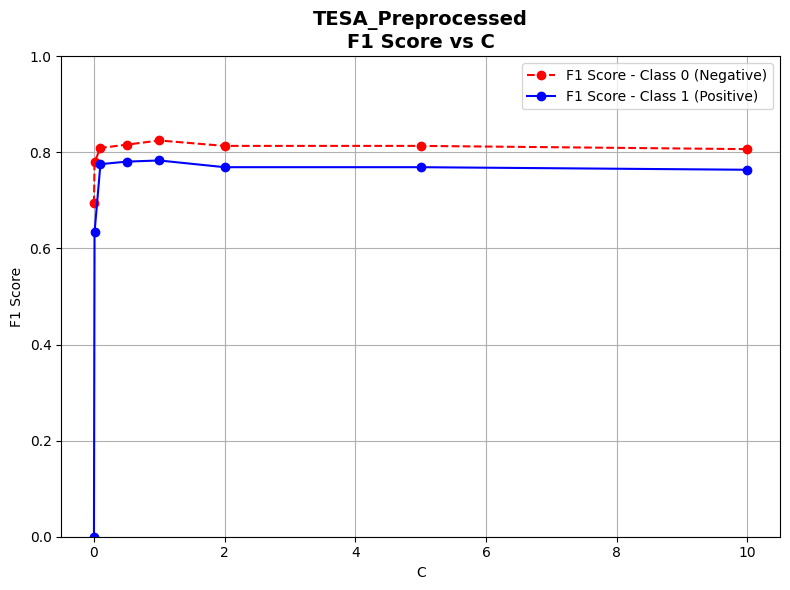


Best C = 1.0 with Avg F1 = 0.804

=== Step 3: LinearSVC with BEST C ===


-- TESA with best C = 10.0 --


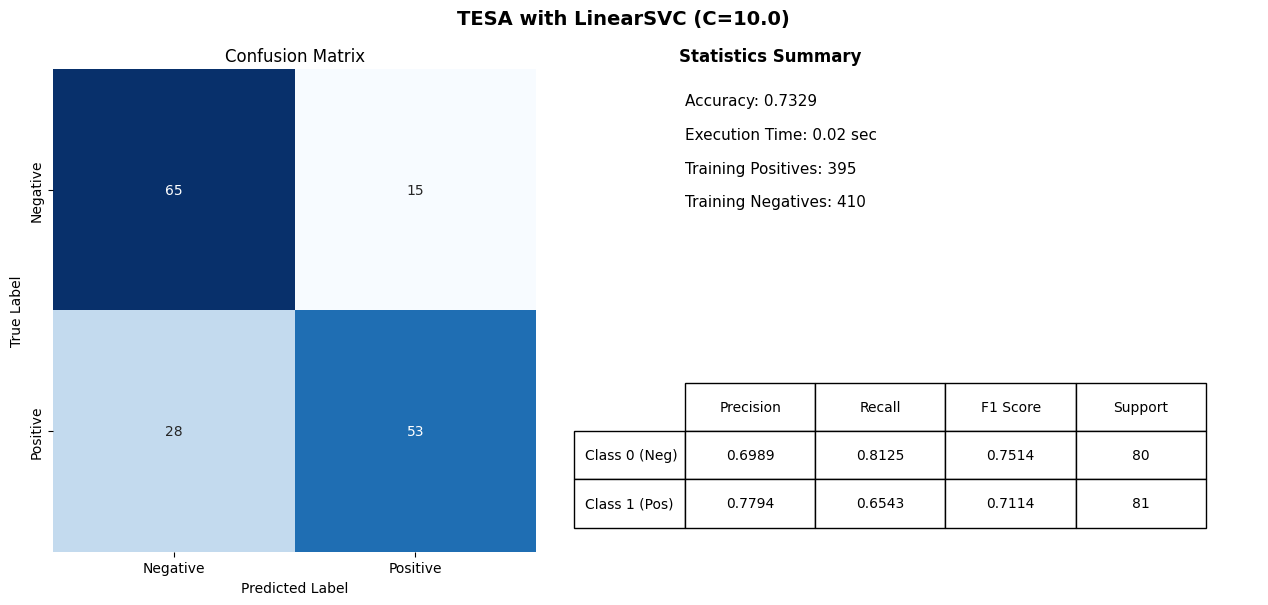


-- TESA_Preprocessed with best C = 1.0 --


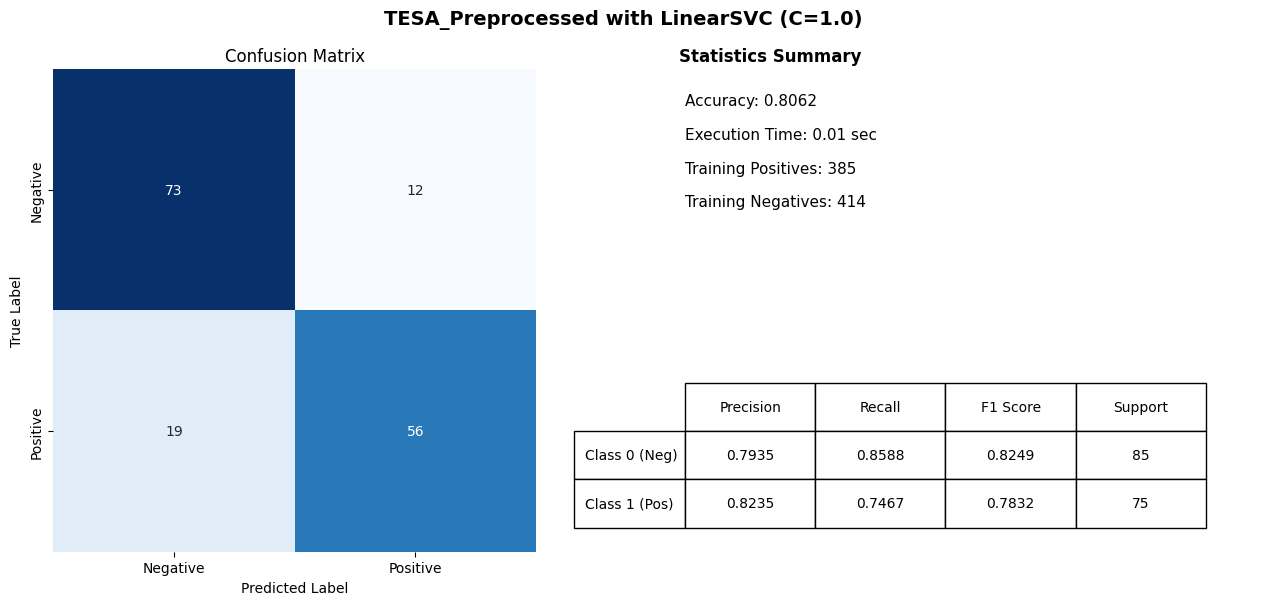

Results saved to 'LinearSVC_Results.csv'


In [19]:
from sklearn.svm import LinearSVC

param_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_LinearSVC_results = []

# === Step 1: LinearSVC with default C
print("\n=== Step 1: LinearSVC with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        model_name="LinearSVC (default)",
        dataset_name=label
    )
    result["Model Group"] = "LinearSVC"
    all_LinearSVC_results.append(result)

# === Step 2: Hyperparameter tuning (C)
print("\n=== Step 2: Tuning C for LinearSVC ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_C = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        param_name="C",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_C

# === Step 3: Evaluate with best C
print("\n=== Step 3: LinearSVC with BEST C ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_C = best_params[label]
    print(f"\n-- {label} with best C = {best_C} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        model_name=f"LinearSVC (C={best_C})",
        dataset_name=label,
        model_params={"C": best_C}
    )
    result["Model Group"] = "LinearSVC"
    all_LinearSVC_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_LinearSVC_results)
results_df.to_csv("LinearSVC_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'LinearSVC_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **SVM (NuSVC)**


=== Step 1: NuSVC with DEFAULT parameters ===


-- Running default model on TESA --


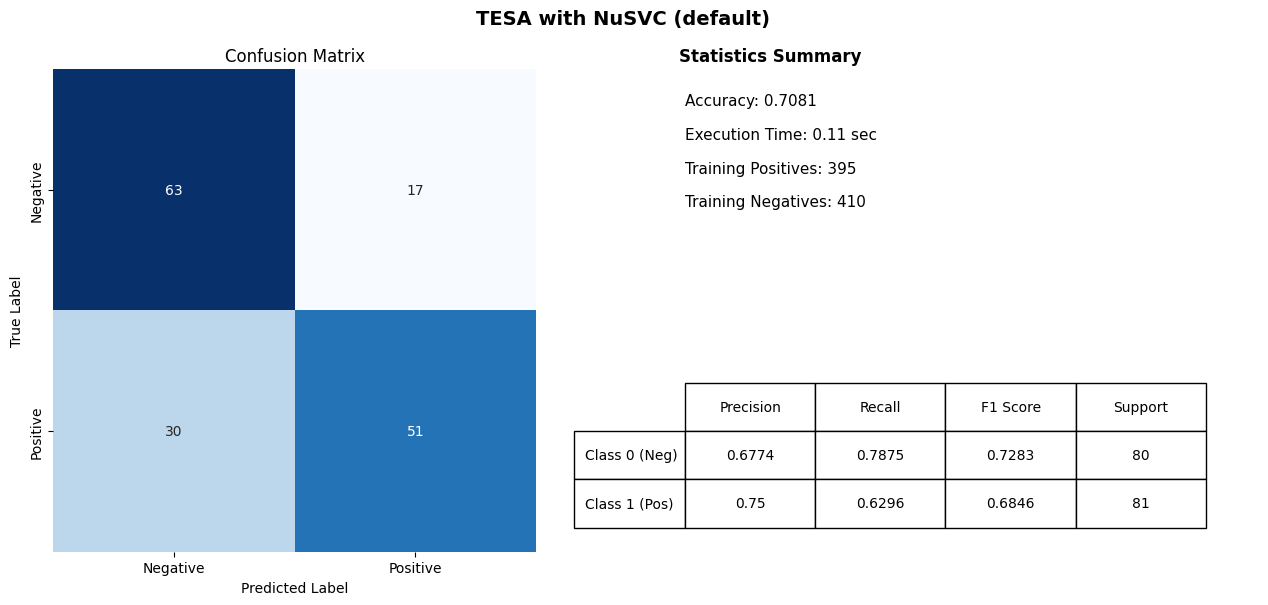


-- Running default model on TESA_Preprocessed --


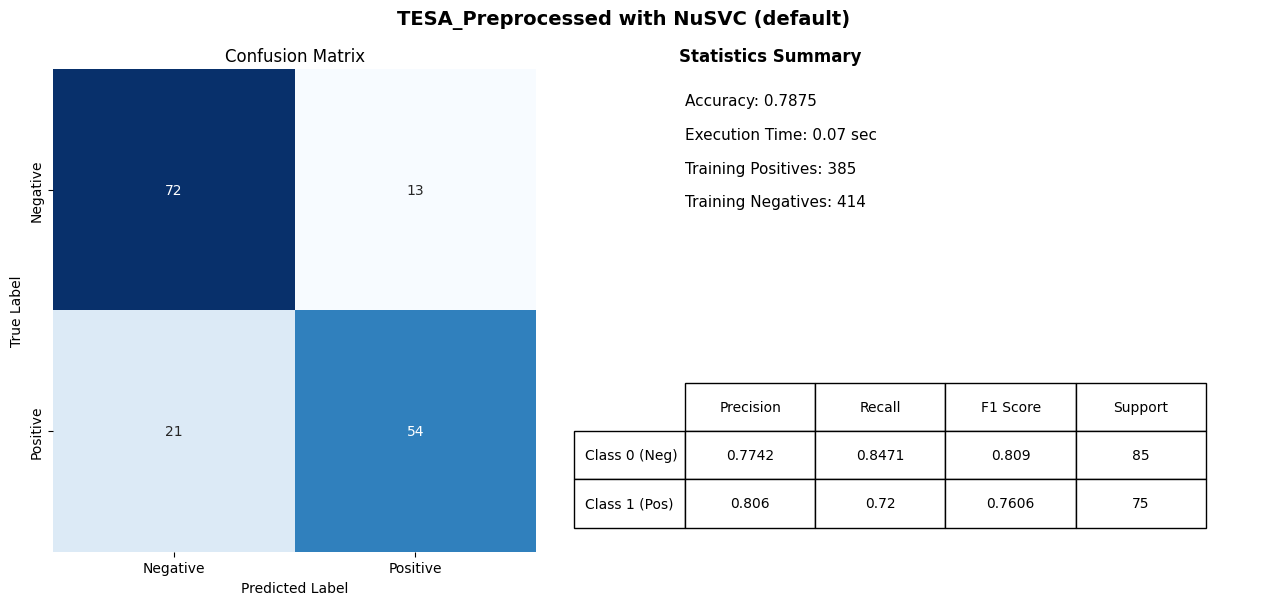


=== Step 2: Tuning nu for NuSVC ===


-- Tuning TESA --



nu: 0.01 | F1[0]: 0.7209 | F1[1]: 0.68 | Avg F1: 0.7005 | Time: 0.1422s
nu: 0.1 | F1[0]: 0.7209 | F1[1]: 0.68 | Avg F1: 0.7005 | Time: 0.1089s
nu: 0.3 | F1[0]: 0.7209 | F1[1]: 0.68 | Avg F1: 0.7005 | Time: 0.1084s
nu: 0.5 | F1[0]: 0.7283 | F1[1]: 0.6846 | Avg F1: 0.7064 | Time: 0.1078s
nu: 0.7 | F1[0]: 0.7209 | F1[1]: 0.68 | Avg F1: 0.7005 | Time: 0.1053s
nu: 0.9 | F1[0]: 0.7143 | F1[1]: 0.6286 | Avg F1: 0.6714 | Time: 0.0991s


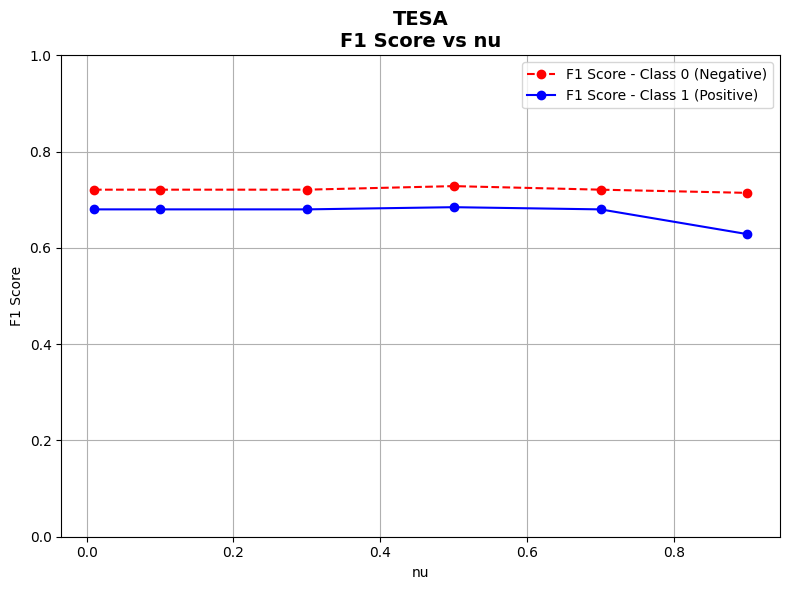


Best nu = 0.5 with Avg F1 = 0.7064

-- Tuning TESA_Preprocessed --



nu: 0.01 | F1[0]: 0.809 | F1[1]: 0.7606 | Avg F1: 0.7848 | Time: 0.0704s
nu: 0.1 | F1[0]: 0.809 | F1[1]: 0.7606 | Avg F1: 0.7848 | Time: 0.061s
nu: 0.3 | F1[0]: 0.809 | F1[1]: 0.7606 | Avg F1: 0.7848 | Time: 0.0599s
nu: 0.5 | F1[0]: 0.809 | F1[1]: 0.7606 | Avg F1: 0.7848 | Time: 0.0789s
nu: 0.7 | F1[0]: 0.8182 | F1[1]: 0.7778 | Avg F1: 0.798 | Time: 0.0616s
nu: 0.9 | F1[0]: 0.8022 | F1[1]: 0.7391 | Avg F1: 0.7707 | Time: 0.0607s


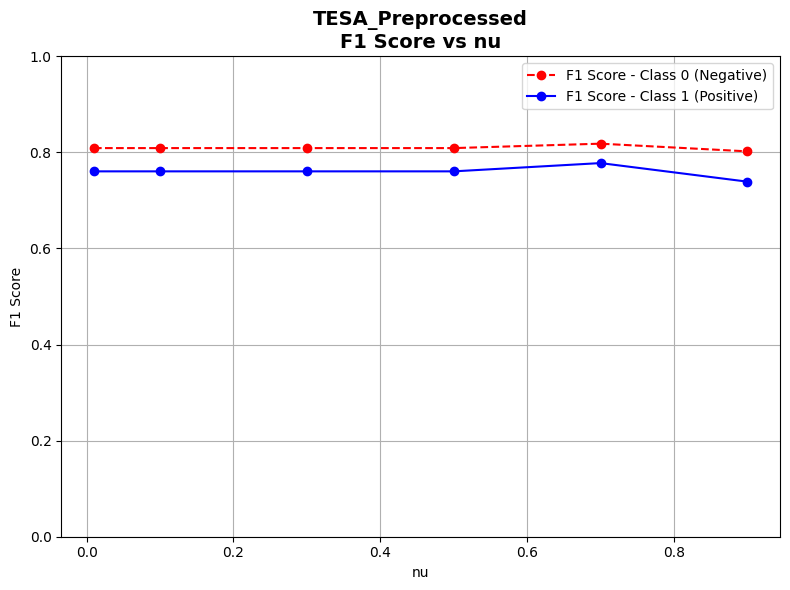


Best nu = 0.7 with Avg F1 = 0.798

=== Step 3: NuSVC with BEST nu ===


-- TESA with best nu = 0.5 --


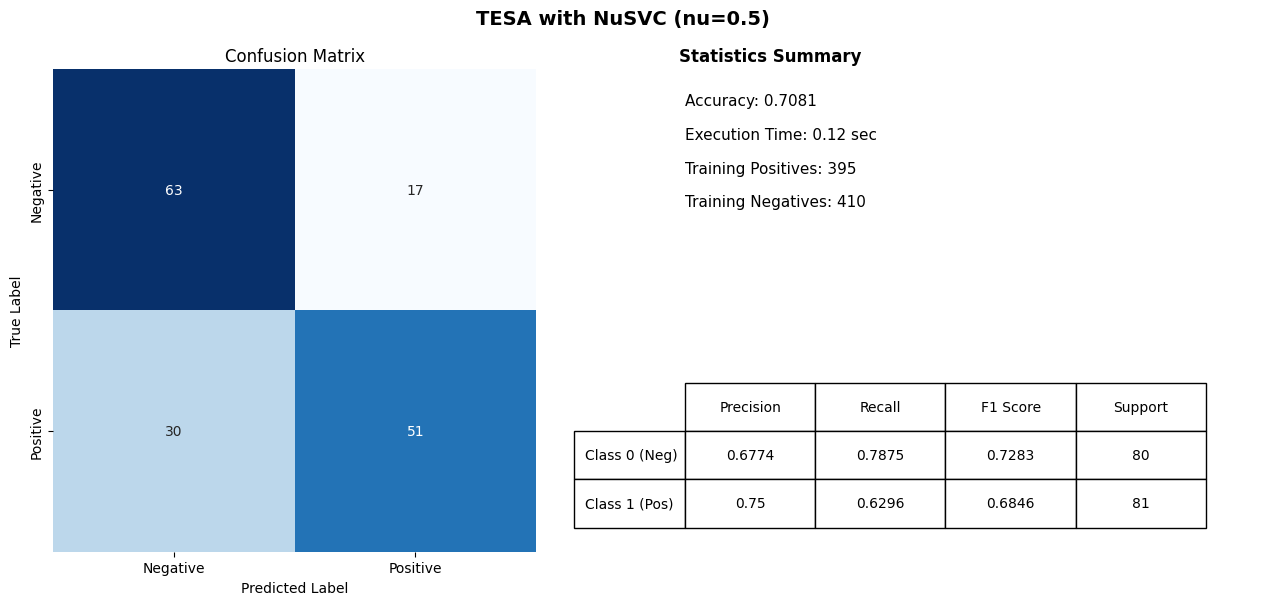


-- TESA_Preprocessed with best nu = 0.7 --


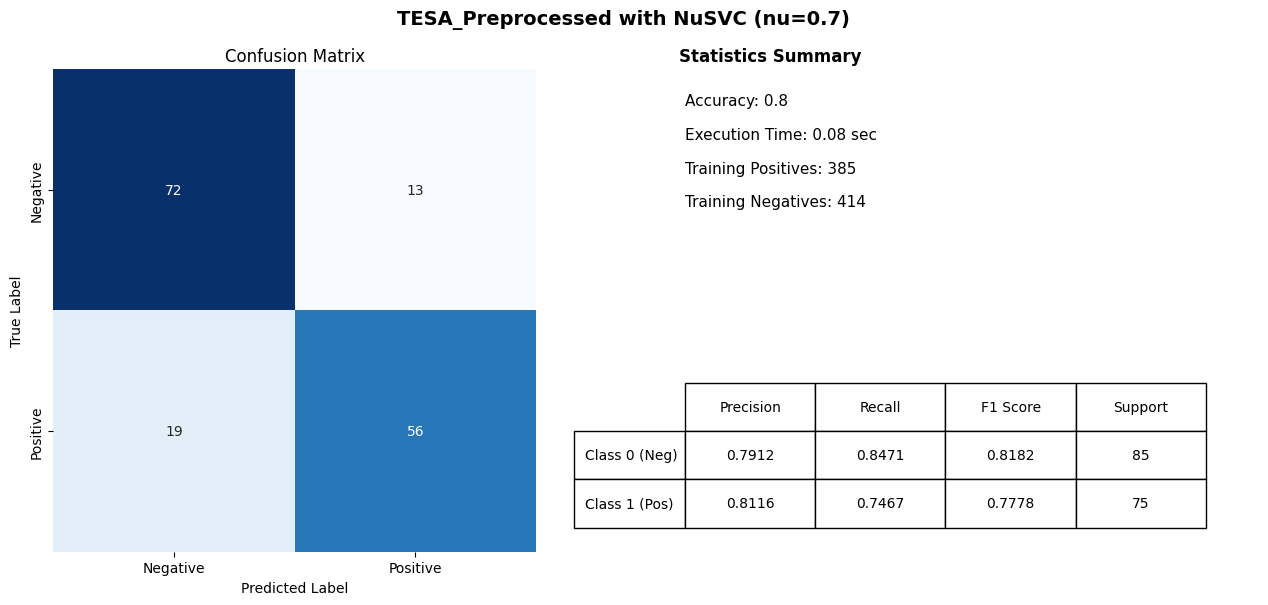

Results saved to 'NuSVC_Results.csv'


In [20]:
from sklearn.svm import NuSVC

param_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
best_params = {}
all_NuSVC_results = []

# === Step 1: NuSVC with default Nu
print("\n=== Step 1: NuSVC with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        model_name="NuSVC (default)",
        dataset_name=label,
    )
    result["Model Group"] = "NuSVC"
    all_NuSVC_results.append(result)

# === Step 2: Hyperparameter tuning (nu)
print("\n=== Step 2: Tuning nu for NuSVC ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_nu = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        param_name="nu",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_nu

# === Step 3: Evaluate with best nu
print("\n=== Step 3: NuSVC with BEST nu ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_nu = best_params[label]
    print(f"\n-- {label} with best nu = {best_nu} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        model_name=f"NuSVC (nu={best_nu})",
        dataset_name=label,
        model_params={"nu": best_nu}
    )
    result["Model Group"] = "NuSVC"
    all_NuSVC_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_NuSVC_results)
results_df.to_csv("NuSVC_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'NuSVC_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **LogisticRegression**


=== Step 1: LogisticRegression with DEFAULT parameters ===


-- Running default model on TESA --


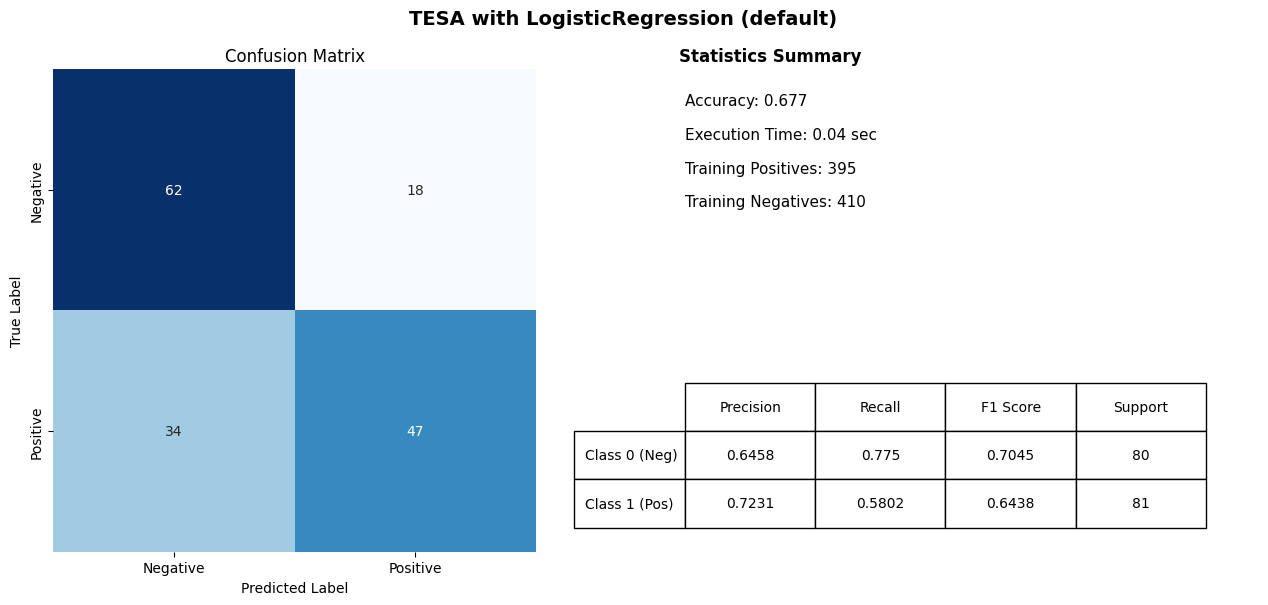


-- Running default model on TESA_Preprocessed --


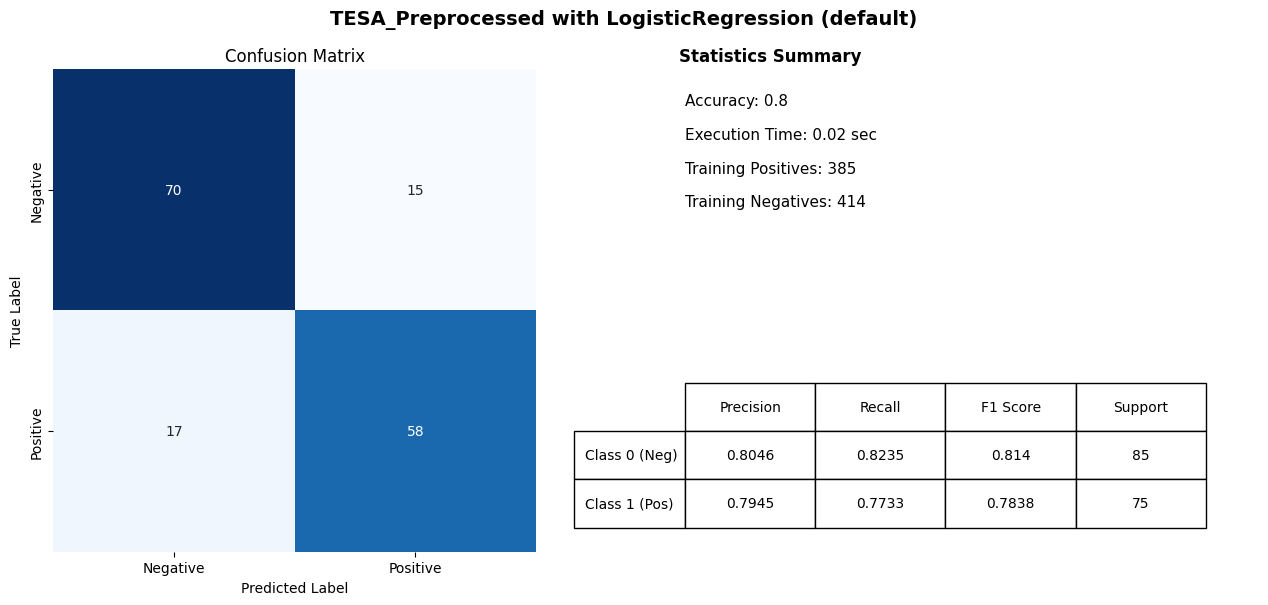


=== Step 2: Tuning C for LogisticRegression ===


-- Tuning TESA --



C: 0.001 | F1[0]: 0.6639 | F1[1]: 0.0 | Avg F1: 0.332 | Time: 0.0158s
C: 0.01 | F1[0]: 0.6639 | F1[1]: 0.0 | Avg F1: 0.332 | Time: 0.0114s
C: 0.1 | F1[0]: 0.7415 | F1[1]: 0.547 | Avg F1: 0.6442 | Time: 0.0104s
C: 0.5 | F1[0]: 0.7 | F1[1]: 0.6197 | Avg F1: 0.6599 | Time: 0.0166s
C: 1.0 | F1[0]: 0.7045 | F1[1]: 0.6438 | Avg F1: 0.6742 | Time: 0.0217s
C: 2.0 | F1[0]: 0.6936 | F1[1]: 0.6443 | Avg F1: 0.669 | Time: 0.0202s
C: 5.0 | F1[0]: 0.7326 | F1[1]: 0.6933 | Avg F1: 0.7129 | Time: 0.016s
C: 10.0 | F1[0]: 0.7326 | F1[1]: 0.6933 | Avg F1: 0.7129 | Time: 0.0274s


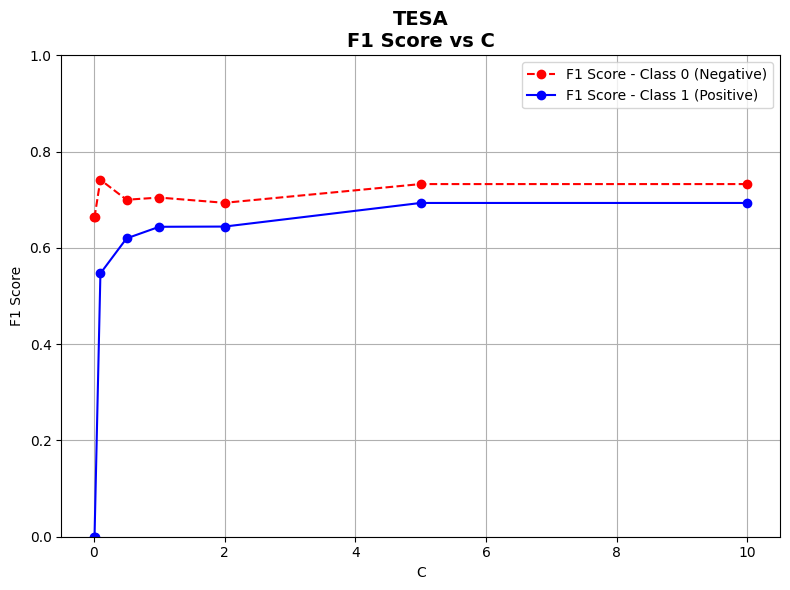


Best C = 5.0 with Avg F1 = 0.7129

-- Tuning TESA_Preprocessed --



C: 0.001 | F1[0]: 0.6939 | F1[1]: 0.0 | Avg F1: 0.3469 | Time: 0.008s
C: 0.01 | F1[0]: 0.6939 | F1[1]: 0.0 | Avg F1: 0.3469 | Time: 0.0114s
C: 0.1 | F1[0]: 0.7857 | F1[1]: 0.6613 | Avg F1: 0.7235 | Time: 0.0072s
C: 0.5 | F1[0]: 0.7955 | F1[1]: 0.75 | Avg F1: 0.7727 | Time: 0.0284s
C: 1.0 | F1[0]: 0.814 | F1[1]: 0.7838 | Avg F1: 0.7989 | Time: 0.0143s
C: 2.0 | F1[0]: 0.8208 | F1[1]: 0.7891 | Avg F1: 0.805 | Time: 0.017s
C: 5.0 | F1[0]: 0.8092 | F1[1]: 0.7755 | Avg F1: 0.7924 | Time: 0.0249s
C: 10.0 | F1[0]: 0.8182 | F1[1]: 0.7778 | Avg F1: 0.798 | Time: 0.0265s


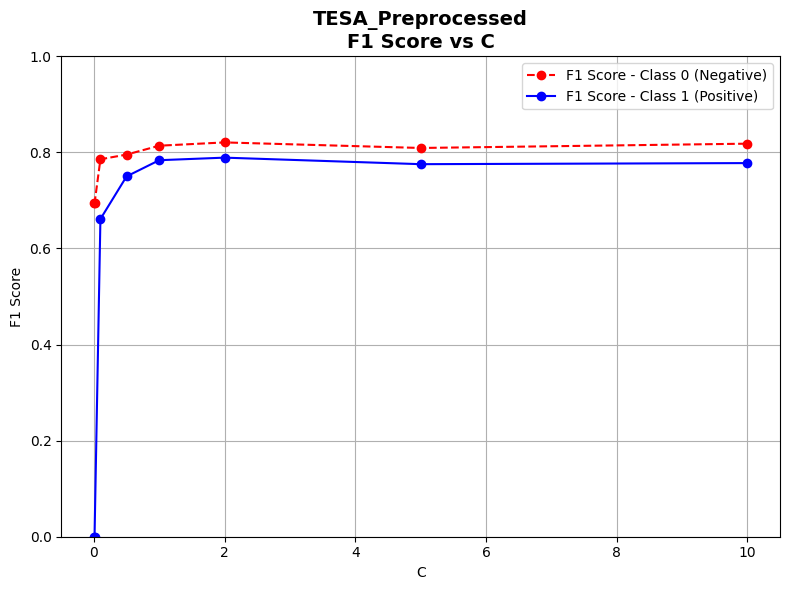


Best C = 2.0 with Avg F1 = 0.805

=== Step 3: LogisticRegression with BEST C ===


-- TESA with best C = 5.0 --


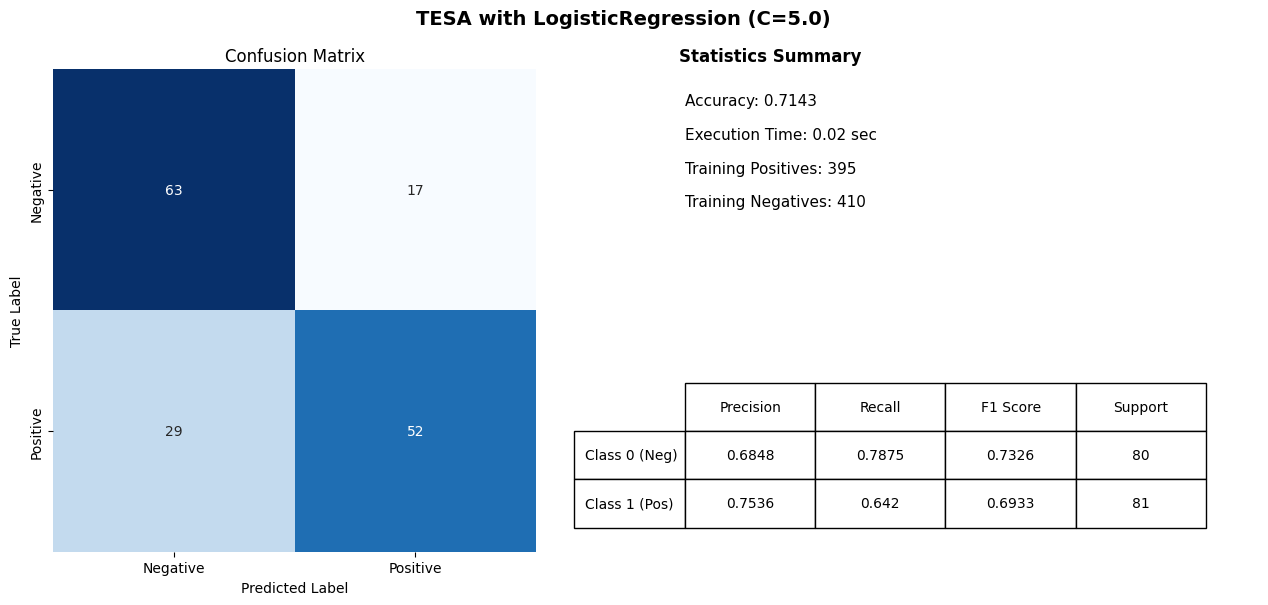


-- TESA_Preprocessed with best C = 2.0 --


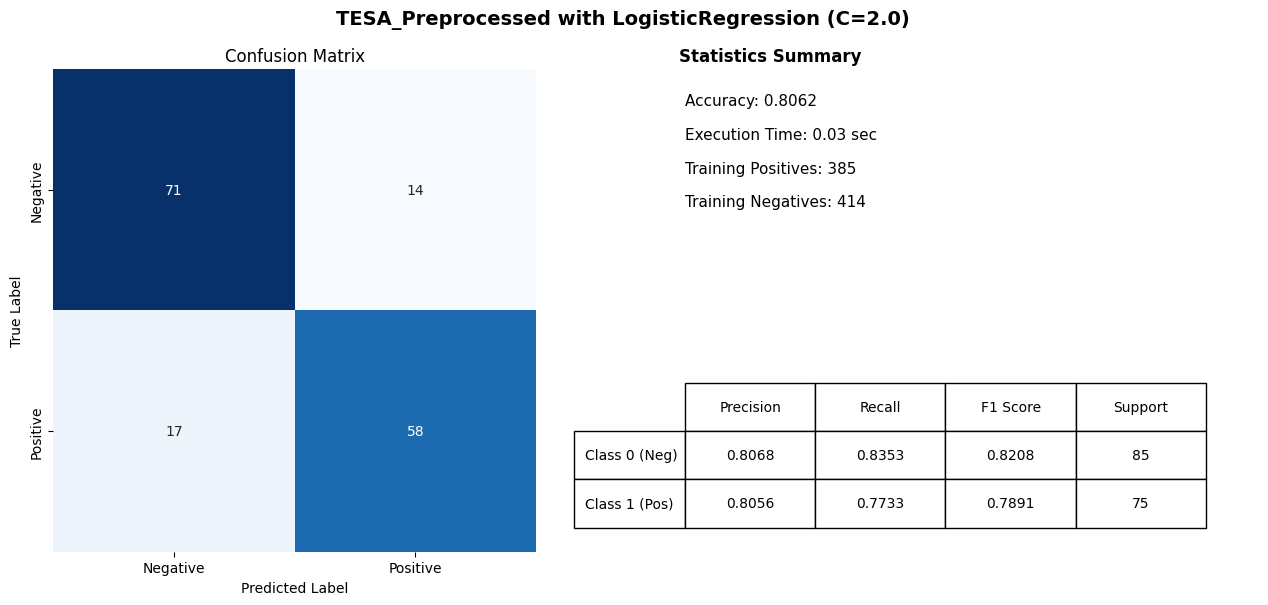

Results saved to 'LogisticRegression_Results.csv'


In [21]:
from sklearn.linear_model import LogisticRegression

param_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_LR_results = []

# === Step 1: Logistic Regression with default C
print("\n=== Step 1: LogisticRegression with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        model_name="LogisticRegression (default)",
        dataset_name=label,
        model_params={"max_iter": 1000}
    )
    result["Model Group"] = "LogisticRegression"
    all_LR_results.append(result)

# === Step 2: Hyperparameter tuning (C)
print("\n=== Step 2: Tuning C for LogisticRegression ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_C = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        param_name="C",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_C

# === Step 3: Evaluate with best C
print("\n=== Step 3: LogisticRegression with BEST C ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_C = best_params[label]
    print(f"\n-- {label} with best C = {best_C} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        model_name=f"LogisticRegression (C={best_C})",
        dataset_name=label,
        model_params={"C": best_C, "max_iter": 1000}
    )
    result["Model Group"] = "LogisticRegression"
    all_LR_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_LR_results)
results_df.to_csv("LogisticRegression_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'LogisticRegression_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)



## **RandomForest**


=== Step 1: RandomForestClassifier with DEFAULT parameters ===


-- Running default model on TESA --


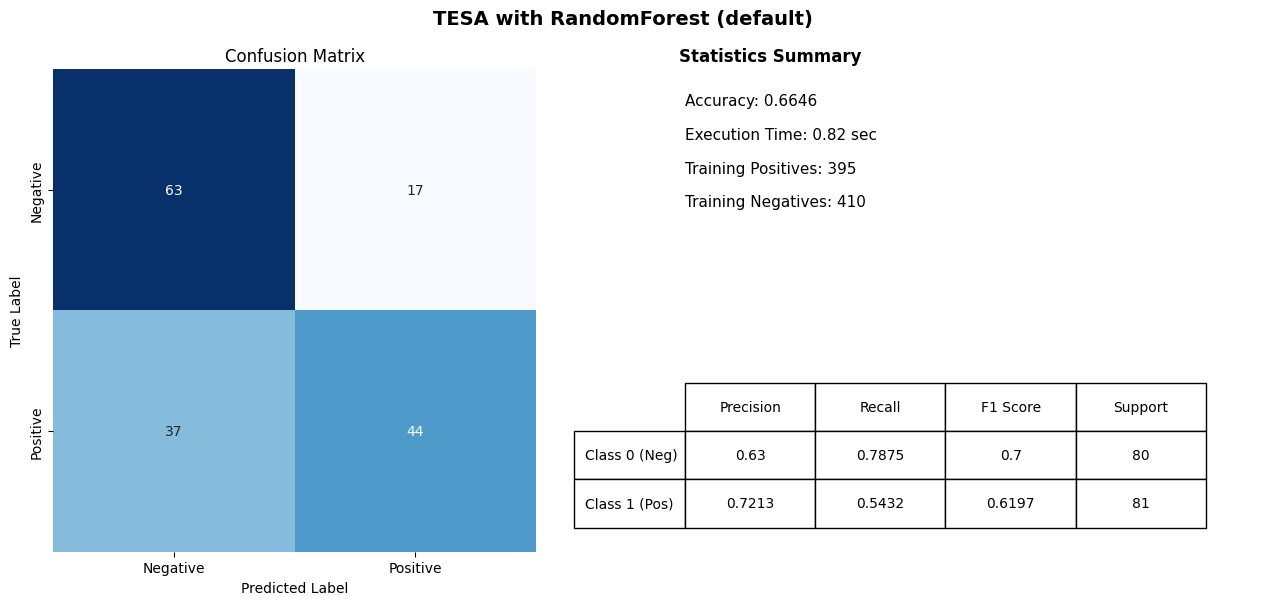


-- Running default model on TESA_Preprocessed --


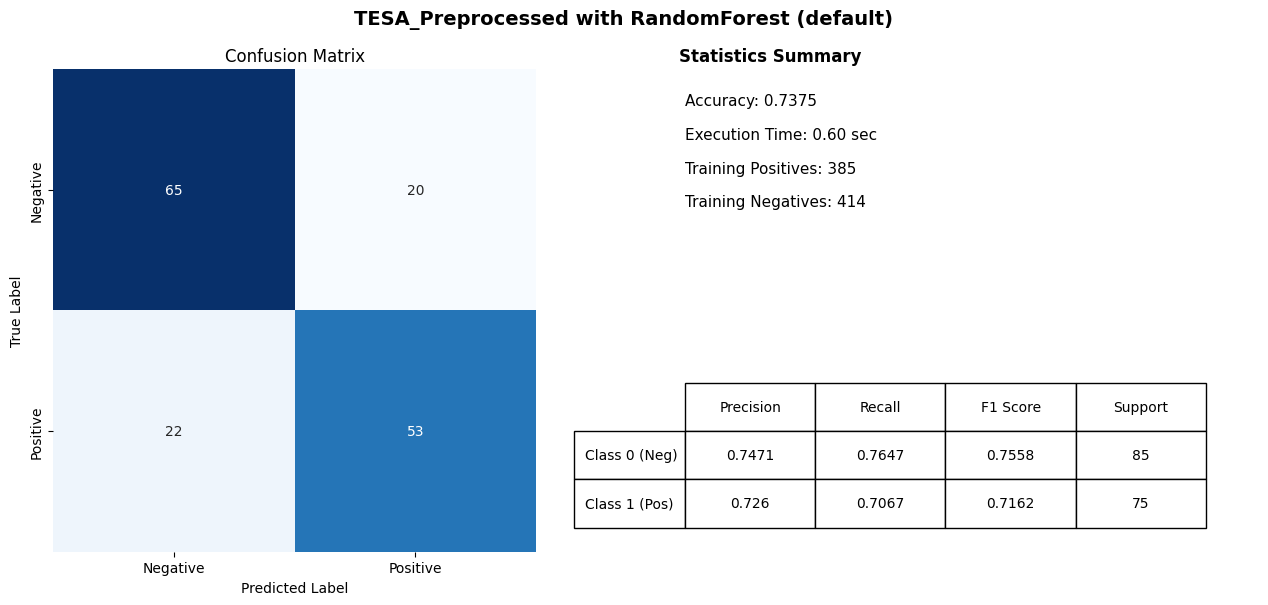


=== Step 2: Tuning n_estimators for RandomForest ===


-- Tuning TESA --



n_estimators: 10 | F1[0]: 0.6629 | F1[1]: 0.5833 | Avg F1: 0.6231 | Time: 0.0637s
n_estimators: 50 | F1[0]: 0.6971 | F1[1]: 0.6395 | Avg F1: 0.6683 | Time: 0.2733s
n_estimators: 100 | F1[0]: 0.7174 | F1[1]: 0.6232 | Avg F1: 0.6703 | Time: 0.5486s
n_estimators: 200 | F1[0]: 0.6966 | F1[1]: 0.625 | Avg F1: 0.6608 | Time: 1.068s
n_estimators: 300 | F1[0]: 0.7111 | F1[1]: 0.6338 | Avg F1: 0.6725 | Time: 1.5654s
n_estimators: 500 | F1[0]: 0.7039 | F1[1]: 0.6294 | Avg F1: 0.6666 | Time: 2.7845s


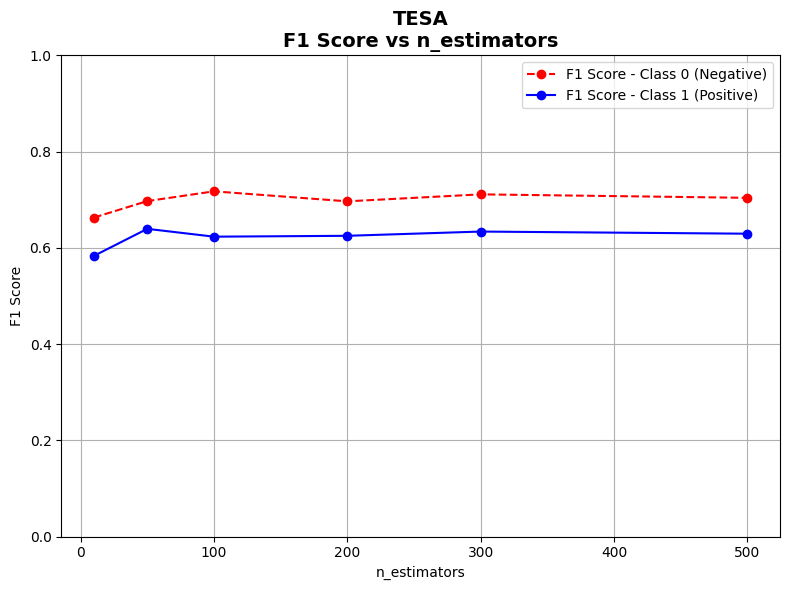


Best n_estimators = 300 with Avg F1 = 0.6725

-- Tuning TESA_Preprocessed --



n_estimators: 10 | F1[0]: 0.6792 | F1[1]: 0.6832 | Avg F1: 0.6812 | Time: 0.0613s
n_estimators: 50 | F1[0]: 0.7771 | F1[1]: 0.731 | Avg F1: 0.7541 | Time: 0.2463s
n_estimators: 100 | F1[0]: 0.7657 | F1[1]: 0.7172 | Avg F1: 0.7415 | Time: 0.4585s
n_estimators: 200 | F1[0]: 0.7514 | F1[1]: 0.7075 | Avg F1: 0.7295 | Time: 0.9376s
n_estimators: 300 | F1[0]: 0.7442 | F1[1]: 0.7027 | Avg F1: 0.7234 | Time: 1.6043s
n_estimators: 500 | F1[0]: 0.763 | F1[1]: 0.7211 | Avg F1: 0.742 | Time: 3.0687s


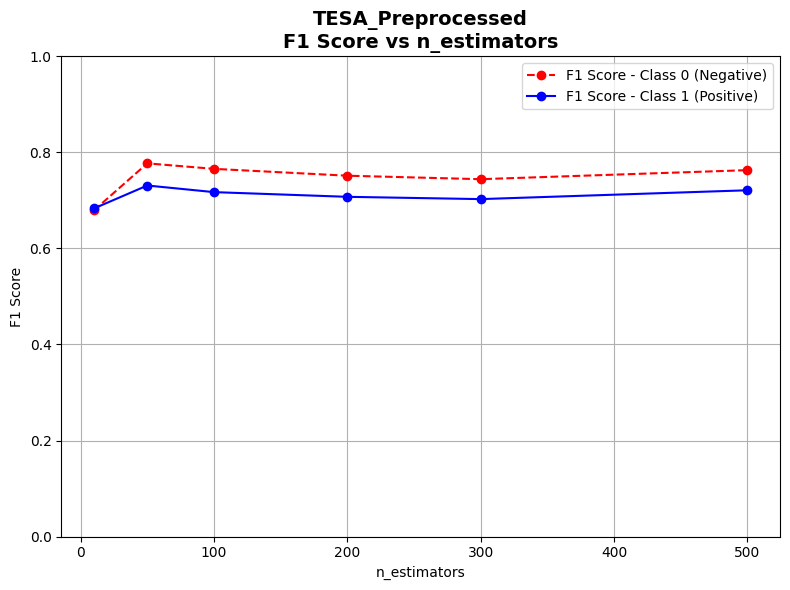


Best n_estimators = 50 with Avg F1 = 0.7541

=== Step 3: RandomForestClassifier with BEST n_estimators ===


-- TESA with best n_estimators = 300 --


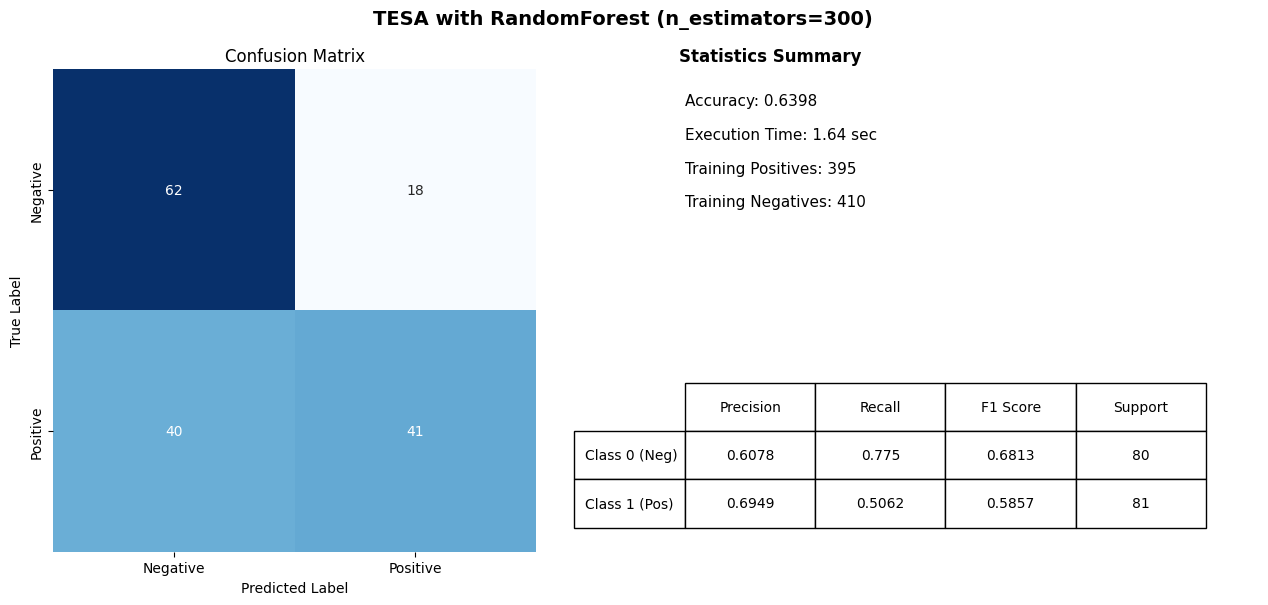


-- TESA_Preprocessed with best n_estimators = 50 --


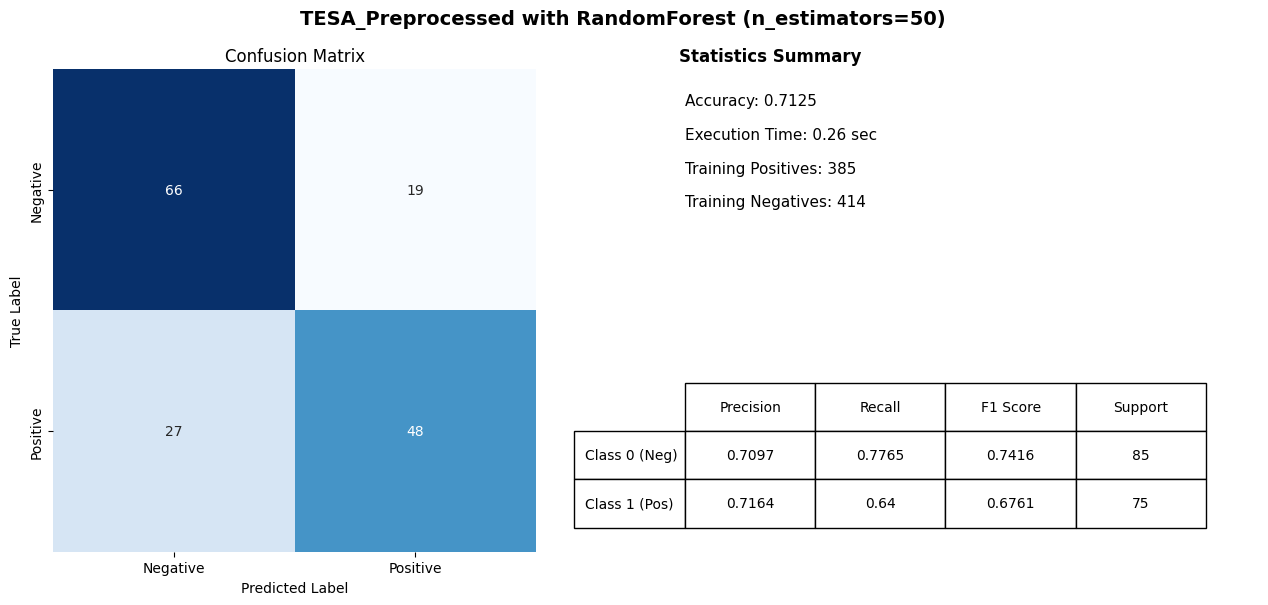

Results saved to 'RandomForest_Results.csv'


In [22]:
from sklearn.ensemble import RandomForestClassifier

param_values = [10, 50, 100, 200, 300, 500]
best_params = {}
all_RF_results = []

# === Step 1: RandomForest with default n_estimators
print("\n=== Step 1: RandomForestClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        model_name="RandomForest (default)",
        dataset_name=label
    )
    result["Model Group"] = "RandomForest"
    all_RF_results.append(result)

# === Step 2: Hyperparameter tuning (n_estimators)
print("\n=== Step 2: Tuning n_estimators for RandomForest ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_n = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        param_name="n_estimators",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_n

# === Step 3: Evaluation with best n_estimators
print("\n=== Step 3: RandomForestClassifier with BEST n_estimators ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_n = best_params[label]
    print(f"\n-- {label} with best n_estimators = {best_n} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        model_name=f"RandomForest (n_estimators={best_n})",
        dataset_name=label,
        model_params={"n_estimators": best_n}
    )
    result["Model Group"] = "RandomForest"
    all_RF_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_RF_results)
results_df.to_csv("RandomForest_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'RandomForest_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **KNeighborsClassifier**


=== Step 1: KNeighborsClassifier with DEFAULT parameters ===


-- Running default model on TESA --


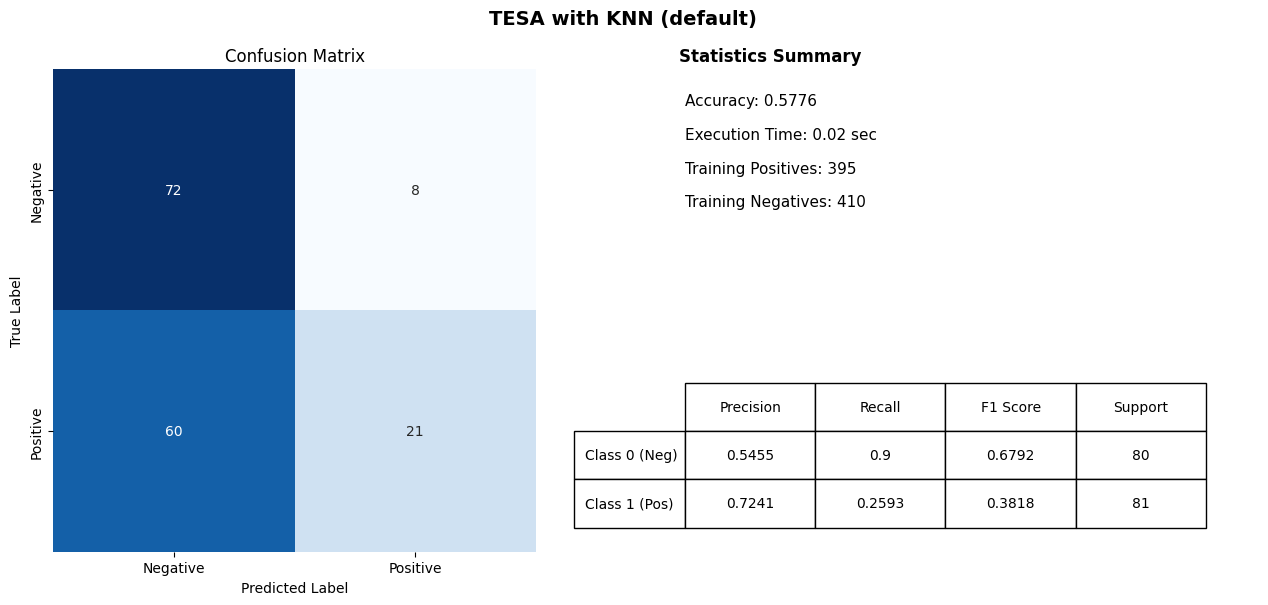


-- Running default model on TESA_Preprocessed --


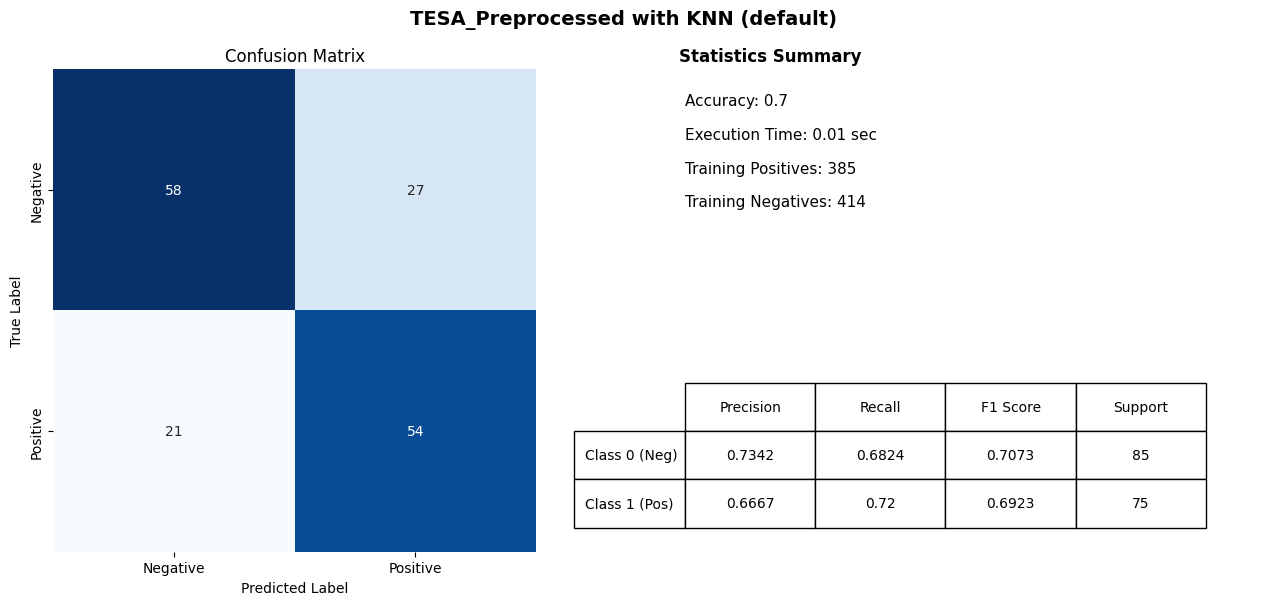


=== Step 2: Tuning n_neighbors for KNN ===


-- Tuning TESA --



n_neighbors: 1 | F1[0]: 0.69 | F1[1]: 0.2366 | Avg F1: 0.4633 | Time: 0.0096s
n_neighbors: 3 | F1[0]: 0.6695 | F1[1]: 0.0482 | Avg F1: 0.3588 | Time: 0.0071s
n_neighbors: 5 | F1[0]: 0.6792 | F1[1]: 0.3818 | Avg F1: 0.5305 | Time: 0.0055s
n_neighbors: 7 | F1[0]: 0.6667 | F1[1]: 0.4237 | Avg F1: 0.5452 | Time: 0.0055s
n_neighbors: 9 | F1[0]: 0.6633 | F1[1]: 0.4553 | Avg F1: 0.5593 | Time: 0.0055s
n_neighbors: 11 | F1[0]: 0.6633 | F1[1]: 0.4762 | Avg F1: 0.5697 | Time: 0.0056s
n_neighbors: 15 | F1[0]: 0.6772 | F1[1]: 0.5414 | Avg F1: 0.6093 | Time: 0.0055s
n_neighbors: 17 | F1[0]: 0.6804 | F1[1]: 0.5156 | Avg F1: 0.598 | Time: 0.0055s
n_neighbors: 19 | F1[0]: 0.6878 | F1[1]: 0.5564 | Avg F1: 0.6221 | Time: 0.0059s


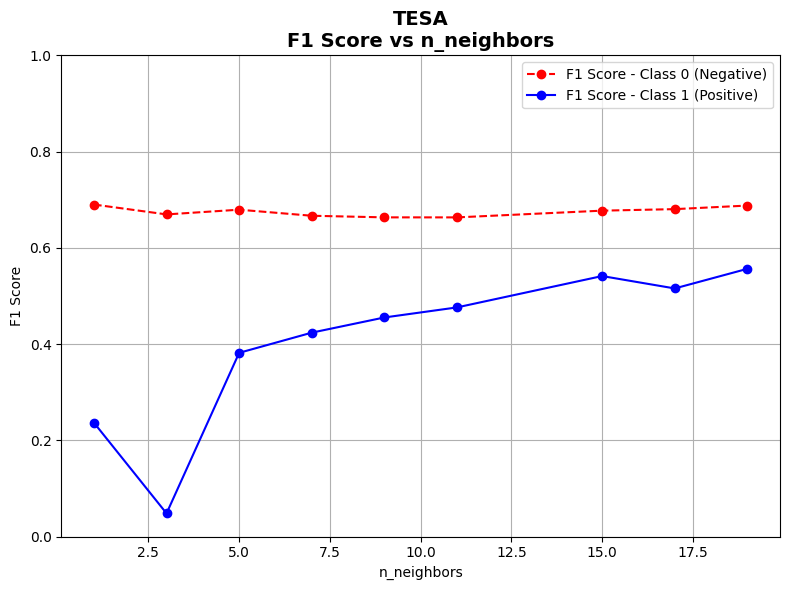


Best n_neighbors = 19 with Avg F1 = 0.6221

-- Tuning TESA_Preprocessed --



n_neighbors: 1 | F1[0]: 0.6707 | F1[1]: 0.6405 | Avg F1: 0.6556 | Time: 0.0076s
n_neighbors: 3 | F1[0]: 0.7037 | F1[1]: 0.6962 | Avg F1: 0.7 | Time: 0.0067s
n_neighbors: 5 | F1[0]: 0.7073 | F1[1]: 0.6923 | Avg F1: 0.6998 | Time: 0.0045s
n_neighbors: 7 | F1[0]: 0.7024 | F1[1]: 0.6711 | Avg F1: 0.6867 | Time: 0.0041s
n_neighbors: 9 | F1[0]: 0.7073 | F1[1]: 0.6923 | Avg F1: 0.6998 | Time: 0.0042s
n_neighbors: 11 | F1[0]: 0.7283 | F1[1]: 0.6803 | Avg F1: 0.7043 | Time: 0.0042s
n_neighbors: 15 | F1[0]: 0.7117 | F1[1]: 0.7006 | Avg F1: 0.7061 | Time: 0.0042s
n_neighbors: 17 | F1[0]: 0.7273 | F1[1]: 0.7097 | Avg F1: 0.7185 | Time: 0.0042s
n_neighbors: 19 | F1[0]: 0.7425 | F1[1]: 0.719 | Avg F1: 0.7307 | Time: 0.005s


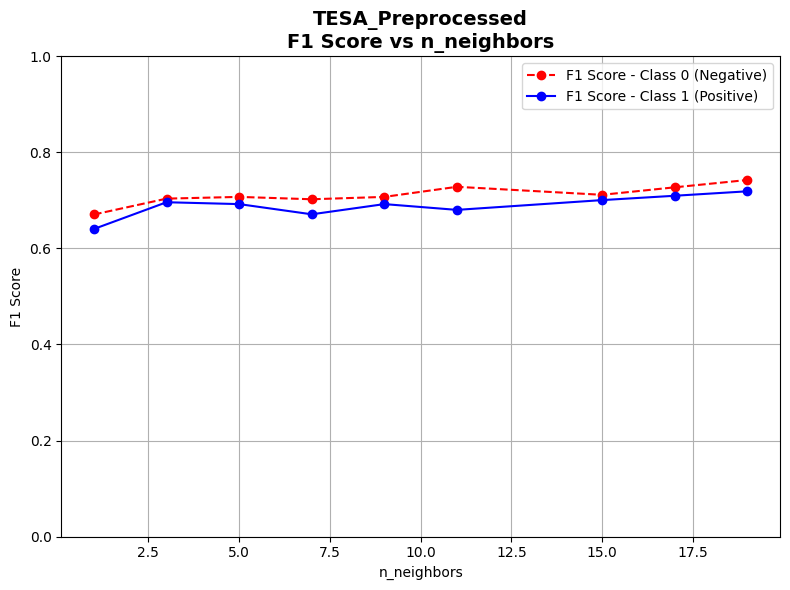


Best n_neighbors = 19 with Avg F1 = 0.7307

=== Step 3: KNN with BEST n_neighbors ===


-- TESA with best k = 19 --


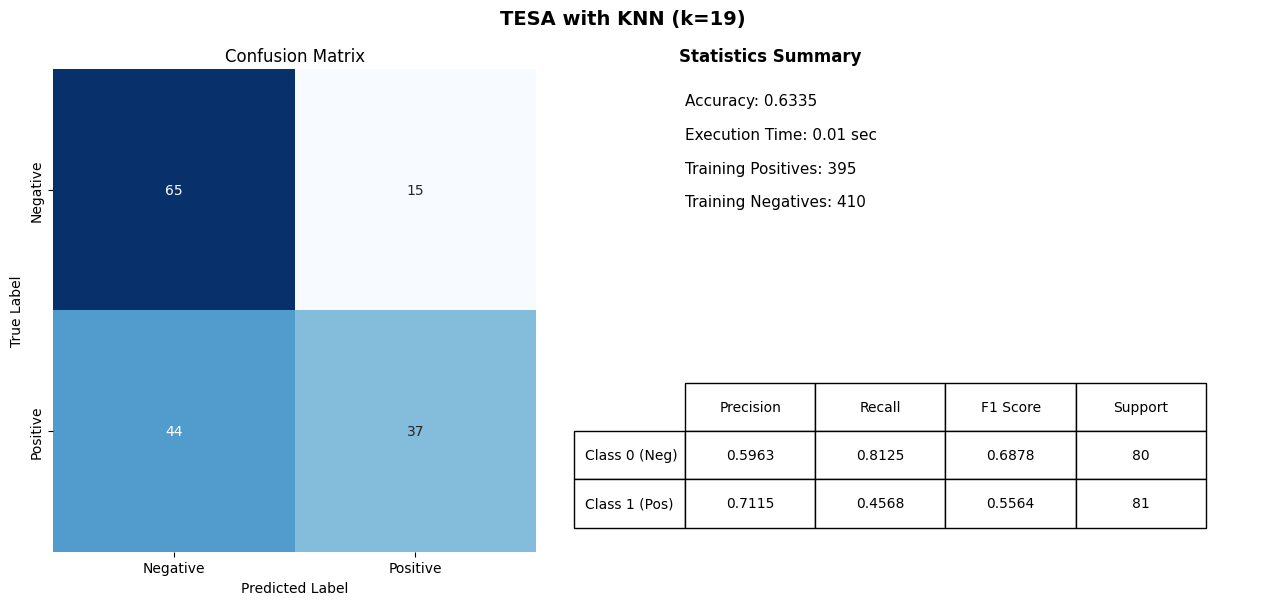


-- TESA_Preprocessed with best k = 19 --


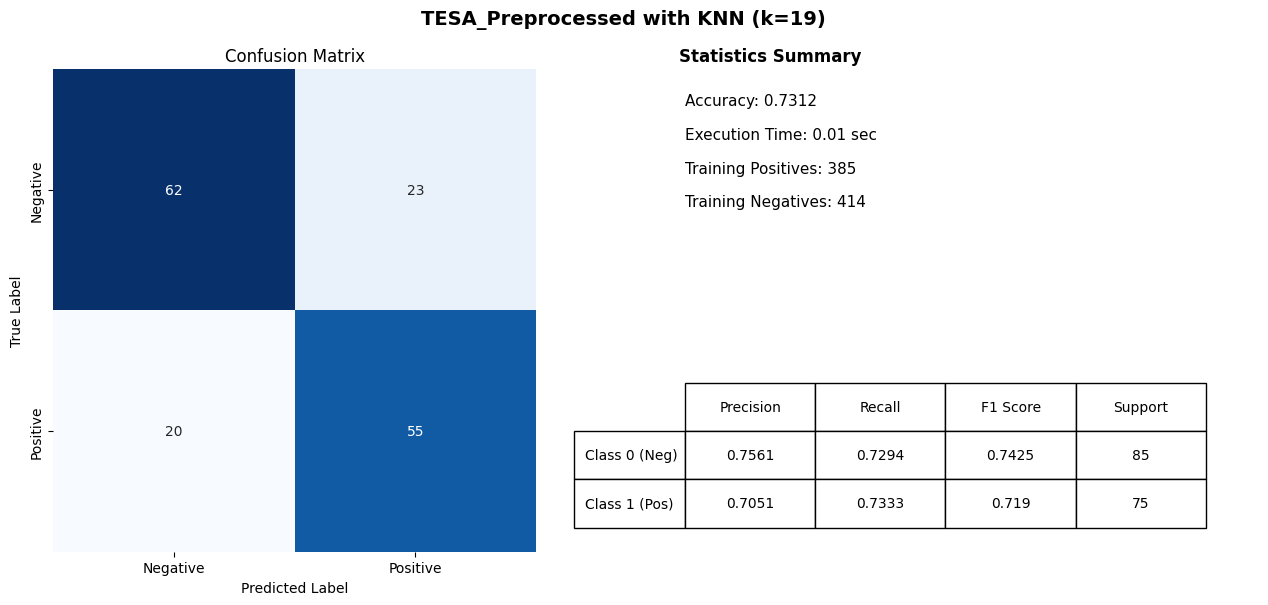

Results saved to 'KNN_Results.csv'


In [23]:
from sklearn.neighbors import KNeighborsClassifier

param_values = [1, 3, 5, 7, 9, 11, 15, 17, 19]
best_params = {}
all_KNN_results = []

# === Step 1: KNN with default n_neighbors
print("\n=== Step 1: KNeighborsClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        model_name="KNN (default)",
        dataset_name=label
    )
    result["Model Group"] = "KNN"
    all_KNN_results.append(result)

# === Step 2: Tuning n_neighbors
print("\n=== Step 2: Tuning n_neighbors for KNN ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_k = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        param_name="n_neighbors",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_k

# === Step 3: Evaluation with best k
print("\n=== Step 3: KNN with BEST n_neighbors ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_k = best_params[label]
    print(f"\n-- {label} with best k = {best_k} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        model_name=f"KNN (k={best_k})",
        dataset_name=label,
        model_params={"n_neighbors": best_k}
    )
    result["Model Group"] = "KNN"
    all_KNN_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_KNN_results)
results_df.to_csv("KNN_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'KNN_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **AdaBoostClassifier**


=== Step 1: AdaBoostClassifier with DEFAULT parameters ===


-- Running default model on TESA --


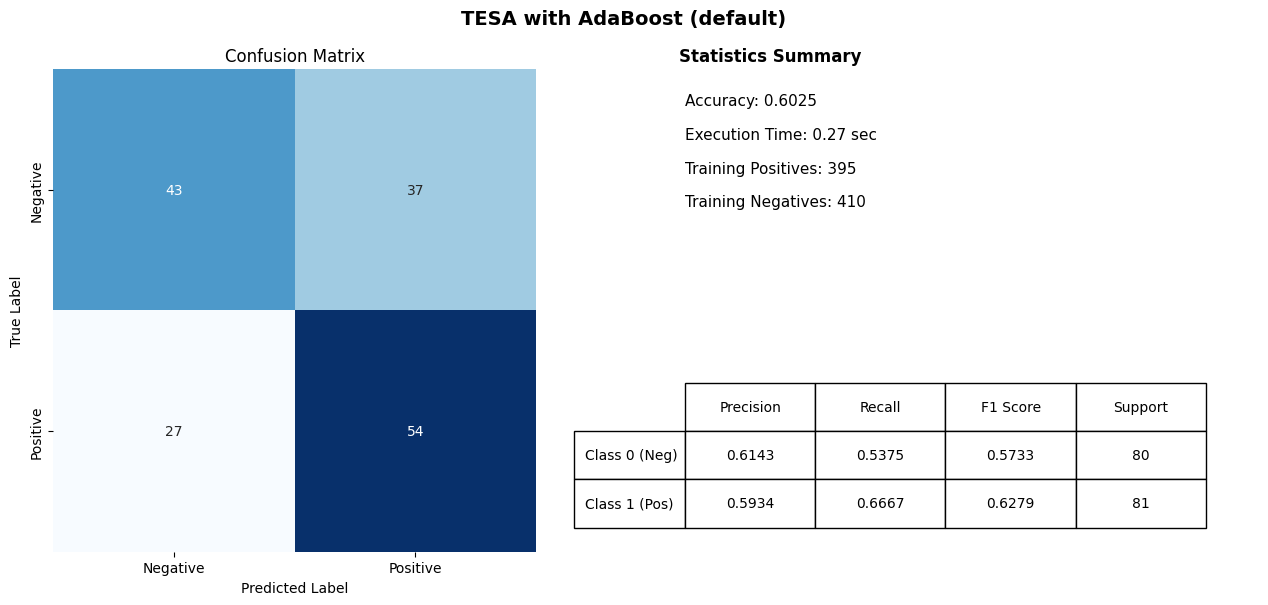


-- Running default model on TESA_Preprocessed --


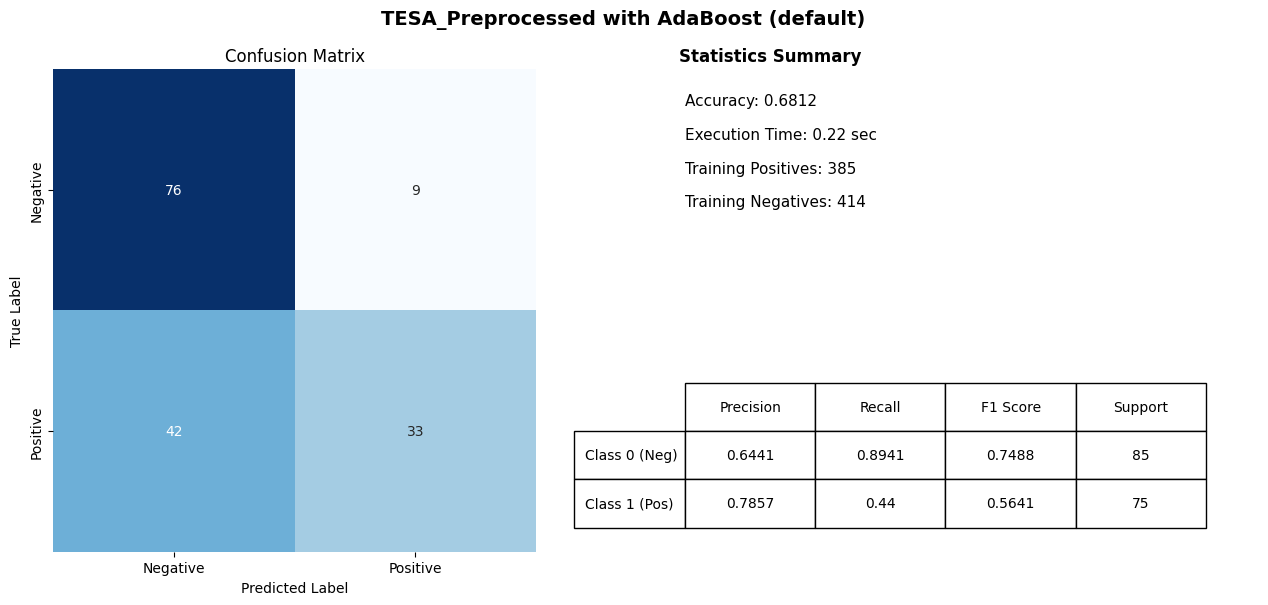


=== Step 2: Tuning n_estimators for AdaBoost ===


-- Tuning TESA --



n_estimators: 10 | F1[0]: 0.4667 | F1[1]: 0.6832 | Avg F1: 0.5749 | Time: 0.0619s
n_estimators: 50 | F1[0]: 0.5733 | F1[1]: 0.6279 | Avg F1: 0.6006 | Time: 0.254s
n_estimators: 100 | F1[0]: 0.6329 | F1[1]: 0.6463 | Avg F1: 0.6396 | Time: 0.5499s
n_estimators: 200 | F1[0]: 0.641 | F1[1]: 0.6627 | Avg F1: 0.6518 | Time: 1.1095s
n_estimators: 300 | F1[0]: 0.6456 | F1[1]: 0.6585 | Avg F1: 0.6521 | Time: 1.6815s
n_estimators: 500 | F1[0]: 0.6497 | F1[1]: 0.6667 | Avg F1: 0.6582 | Time: 3.7722s


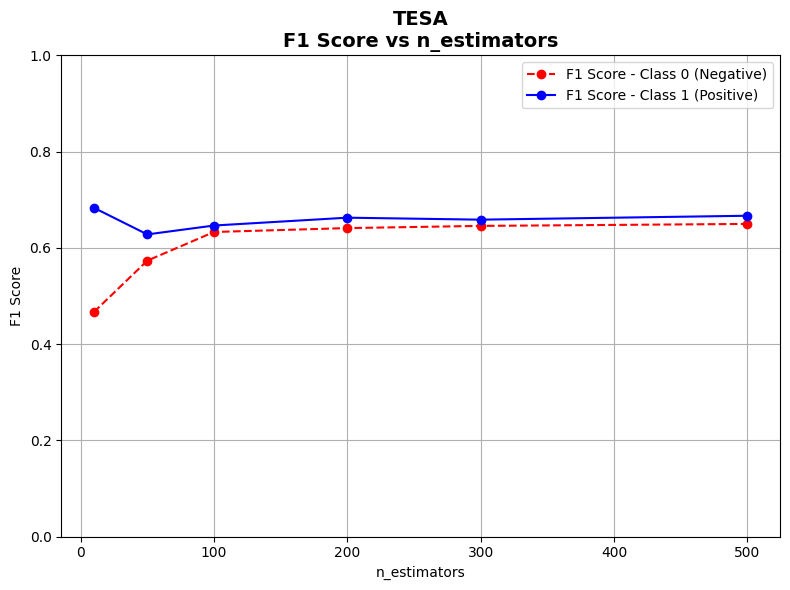


Best n_estimators = 500 with Avg F1 = 0.6582

-- Tuning TESA_Preprocessed --



n_estimators: 10 | F1[0]: 0.7162 | F1[1]: 0.2857 | Avg F1: 0.5009 | Time: 0.057s
n_estimators: 50 | F1[0]: 0.7488 | F1[1]: 0.5641 | Avg F1: 0.6564 | Time: 0.1994s
n_estimators: 100 | F1[0]: 0.7668 | F1[1]: 0.6457 | Avg F1: 0.7063 | Time: 0.4376s
n_estimators: 200 | F1[0]: 0.7634 | F1[1]: 0.6716 | Avg F1: 0.7175 | Time: 0.8201s
n_estimators: 300 | F1[0]: 0.7391 | F1[1]: 0.6471 | Avg F1: 0.6931 | Time: 1.3199s
n_estimators: 500 | F1[0]: 0.7333 | F1[1]: 0.6571 | Avg F1: 0.6952 | Time: 2.1261s


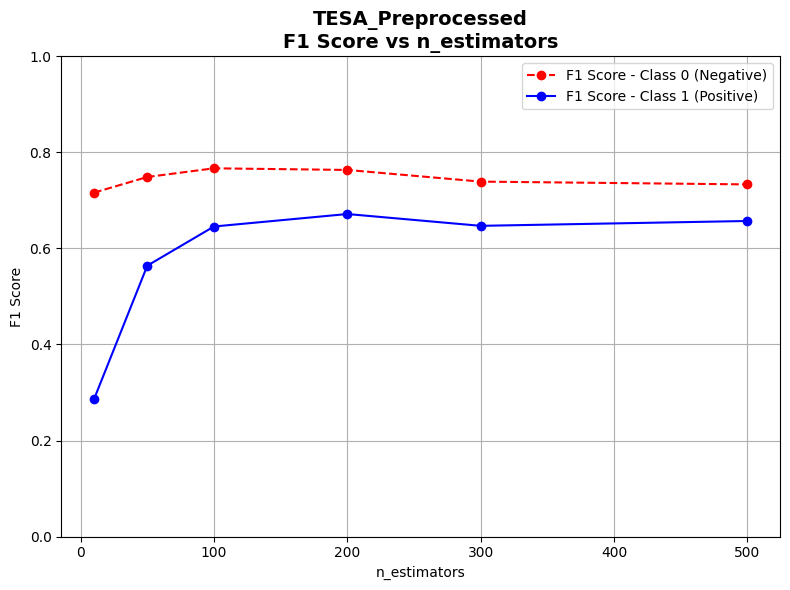


Best n_estimators = 200 with Avg F1 = 0.7175

=== Step 3: AdaBoostClassifier with BEST n_estimators ===


-- TESA with best n_estimators = 500 --


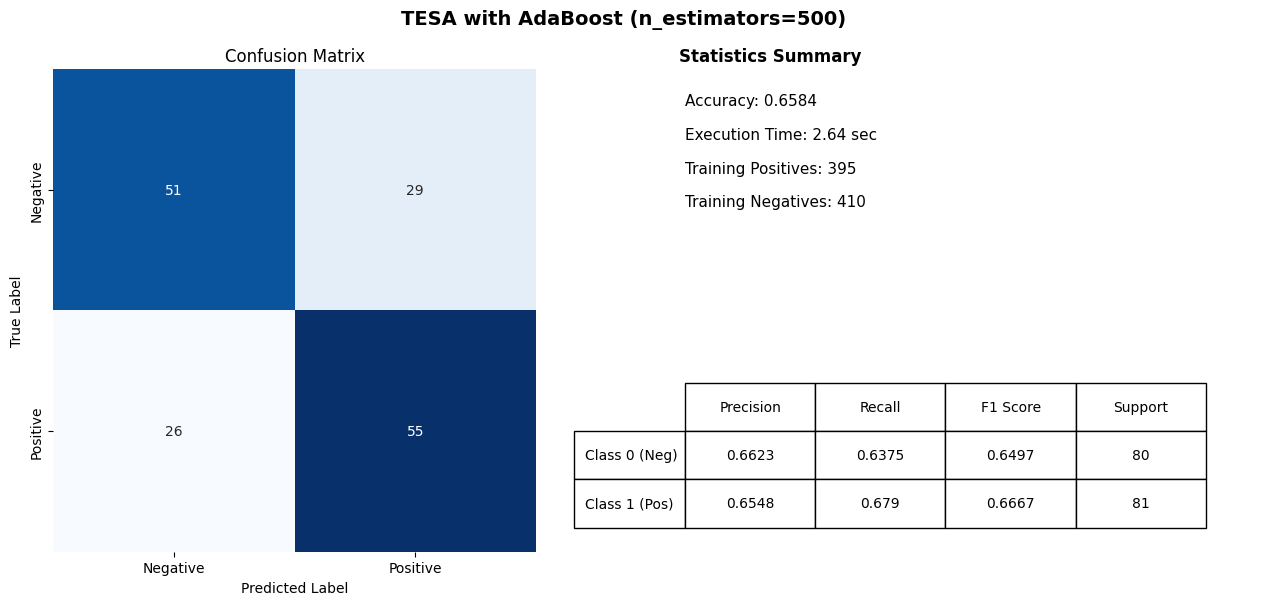


-- TESA_Preprocessed with best n_estimators = 200 --


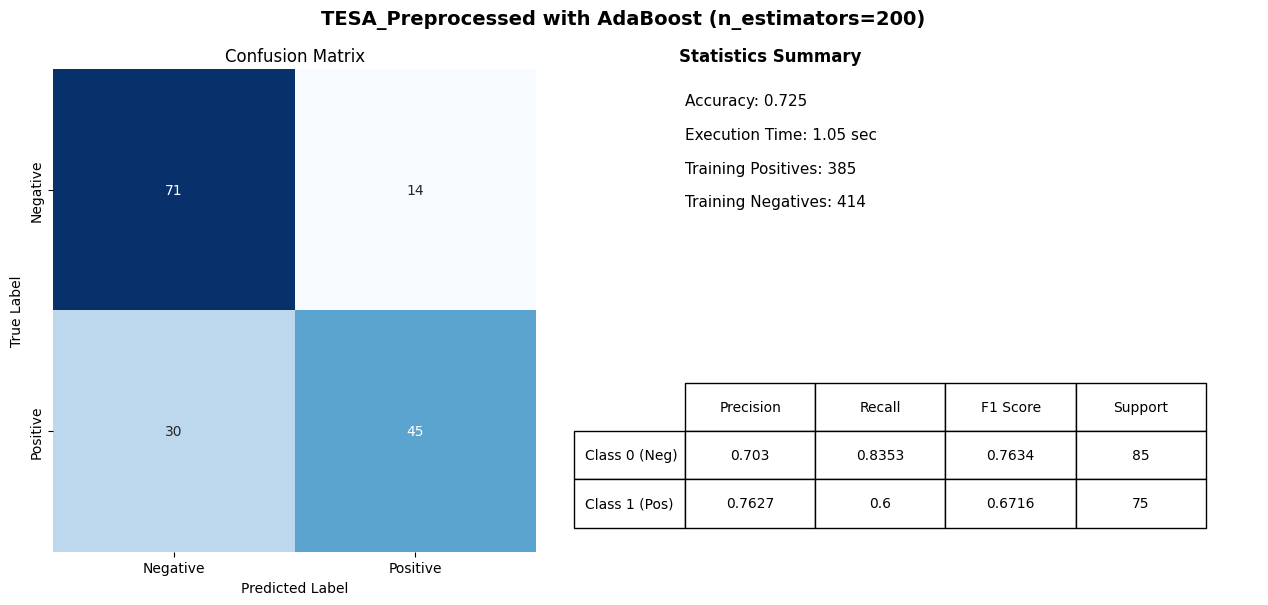

Results saved to 'AdaBoost_Results.csv'


In [24]:
from sklearn.ensemble import AdaBoostClassifier

param_values = [10, 50, 100, 200, 300, 500]
best_params = {}
all_ADA_results = []

# === Step 1: AdaBoost with default n_estimators
print("\n=== Step 1: AdaBoostClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        model_name="AdaBoost (default)",
        dataset_name=label
    )
    result["Model Group"] = "AdaBoost"
    all_ADA_results.append(result)

# === Step 2: Hyperparameter tuning (n_estimators)
print("\n=== Step 2: Tuning n_estimators for AdaBoost ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_n = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        param_name="n_estimators",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_n

# === Step 3: Evaluate with best n_estimators
print("\n=== Step 3: AdaBoostClassifier with BEST n_estimators ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_n = best_params[label]
    print(f"\n-- {label} with best n_estimators = {best_n} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        model_name=f"AdaBoost (n_estimators={best_n})",
        dataset_name=label,
        model_params={"n_estimators": best_n}
    )
    result["Model Group"] = "AdaBoost"
    all_ADA_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_ADA_results)
results_df.to_csv("AdaBoost_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'AdaBoost_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)

# **Save All**

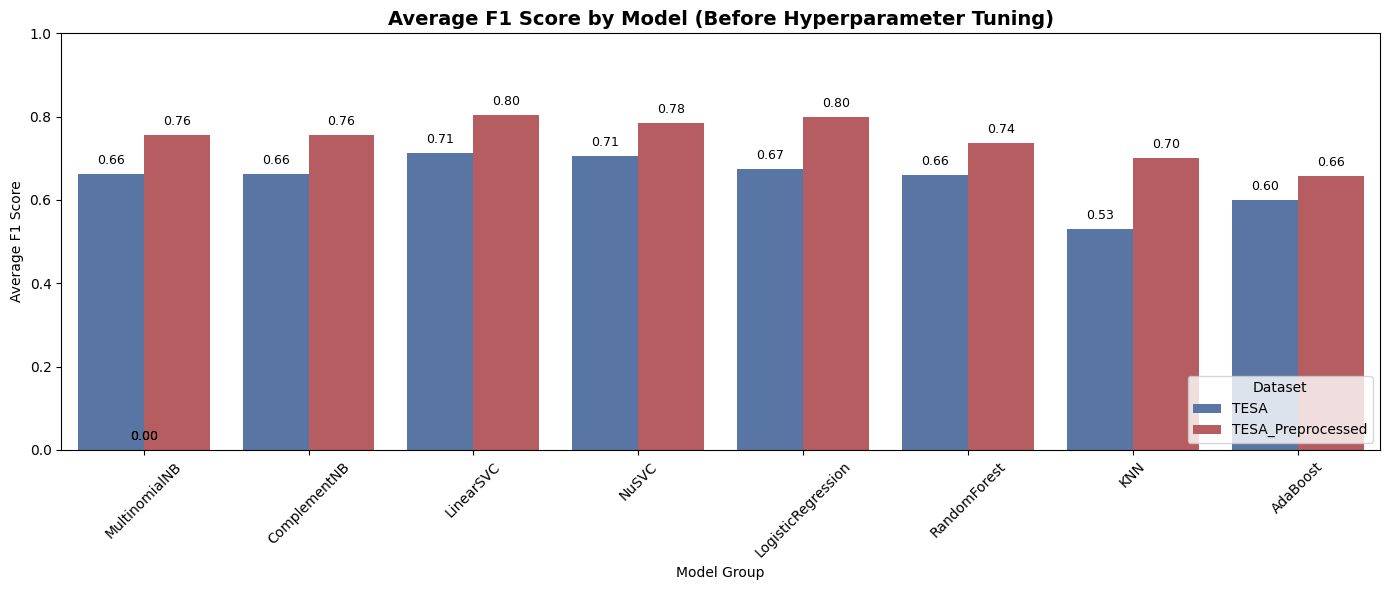

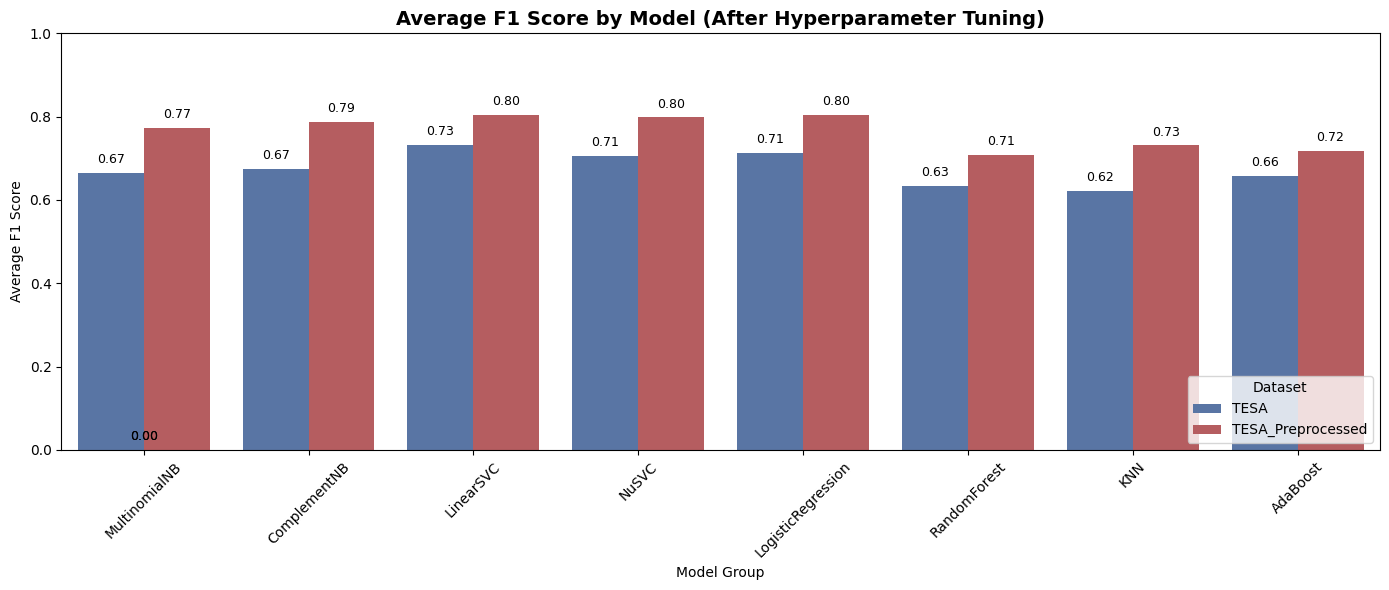

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_Algo_results.to_csv("All_Algorithms_Results.csv", index=False, encoding="utf-8-sig")

# Load the global results
df = pd.read_csv("All_Algorithms_Results.csv")

# Calculate Avg F1 score
df["Avg_F1"] = (df["F1_0"] + df["F1_1"]) / 2

# Split into before and after tuning
before_opt = df[df["Algorithm"].str.contains("default")]
after_opt = df[~df["Algorithm"].str.contains("default")]

# Define dataset order and color palette
dataset_order = ["TESA", "TESA_Preprocessed"]
dataset_palette = {
    "TESA": "#4c72b0",
    "TESA_Preprocessed": "#c44e52",
}

def plot_avg_f1(data, title):
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(
        data=data,
        x="Model Group",
        y="Avg_F1",
        hue="Dataset",
        hue_order=dataset_order,
        palette=dataset_palette
    )

    # Add value labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel("Average F1 Score")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.legend(title="Dataset", loc='lower right')
    plt.tight_layout()
    plt.show()

# Plot before and after optimization
plot_avg_f1(before_opt, "Average F1 Score by Model (Before Hyperparameter Tuning)")
plot_avg_f1(after_opt, "Average F1 Score by Model (After Hyperparameter Tuning)")
